<h1>Client: No-Churn Telecom</h1>

<h2>Project Ref: PM-PR-0017</h2>

# Business Case: No-Churn Telecom

## Overview
No-Churn Telecom is an established Telecom operator in Europe, operating for more than a decade. The telecom industry has become highly competitive, with the emergence of new players, making customer retention a significant challenge. Despite implementing No-Churn initiatives, such as reducing tariffs and promoting offers, the churn rate (percentage of customers migrating to competitors) remains well above 10%.

To address this challenge, No-Churn Telecom is looking to leverage Machine Learning (ML) to enhance their customer retention strategies. The primary goals of the ML project are as follows:

## Project Goals

### 1. Understanding Variables Influencing Customer Migration
   - **Objective:** Identify and understand the variables that influence customers to migrate to competitors.
   - **Outcome:** Gain insights into the factors contributing to churn, enabling targeted interventions.

### 2. Churn Risk Score Creation
   - **Objective:** Develop churn risk scores to indicate the likelihood of customer churn.
   - **Outcome:** Enable the identification of high-risk customers, facilitating the implementation of proactive retention campaigns.

### 3. Introducing "CHURN-FLAG" Variable
   - **Objective:** Introduce a new predicting variable, "CHURN-FLAG," with values YES(1) or NO(0).
   - **Outcome:** Enable targeted email campaigns with lucrative offers to customers identified as high-risk (CHURN-FLAG = 1).


In [ ]:
import pandas as pd
import numpy as np
import mysql.connector
import warnings
warnings.filterwarnings('ignore')
import sweetviz as viz
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## making connections to database server
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team3',
                                  password='DM!$!Team!27@9!20&',
                                  database='project_telecom')

In [ ]:
# Fetching Records
query = "select * from telecom_churn_data"
output = pd.read_sql(query,connection)
print(output.shape)
output

(4617, 21)


,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [ ]:
#Creating CSV File
output.to_csv('churn_data.csv')

In [ ]:
#Load_data
pd.set_option('display.max_columns', None)
data=pd.read_csv("churn_data.csv")
data.head(3)

,Unnamed: 0,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [ ]:
#dropping irrelevant column
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data.rename(columns={'columns1':'State','columns2':'Account_Length','columns3':'Area_Code','columns4':'Phone','columns5':'International_plan',
                    'columns6':'VMail_Plan','columns7':'Vmail_Message','columns8':'Day_Mins','columns9':'Day_Calls','columns10':'Day_Charge',
                    'columns11':'Eve_Mins','columns12':'Eve_Calls','columns13':'Eve_Charge','columns14':'Night_Mins','columns15':'Night_Calls',
                    'columns16':'Night_Charge','columns17':'International_mins','columns18':'International_calls','columns19':'International Charge',
                    'columns20':'CustServ_Calls','columns21':'Churn'},inplace=True)

In [ ]:
data.head()

,State,Account_Length,Area_Code,Phone,International_plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_mins,International_calls,International Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## Basic checks

In [ ]:
data.columns


Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_plan',
       'VMail_Plan', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_mins', 'International_calls',
       'International Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   Vmail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

In [ ]:
data.describe()

,Account_Length,Area_Code,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_mins,International_calls,International Charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
data.describe(include='O')

,State,Phone,International_plan,VMail_Plan,Churn
count,4617,4617,4617,4617,4617
unique,51,4617,2,2,2
top,WV,382-4657,no,no,False.
freq,149,1,4171,3381,3961


In [ ]:
data.isnull().sum()

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_plan      0
VMail_Plan              0
Vmail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_mins      0
International_calls     0
International Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

In [ ]:
data.shape

(4617, 21)

## EDA

In [ ]:
my_report = viz.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


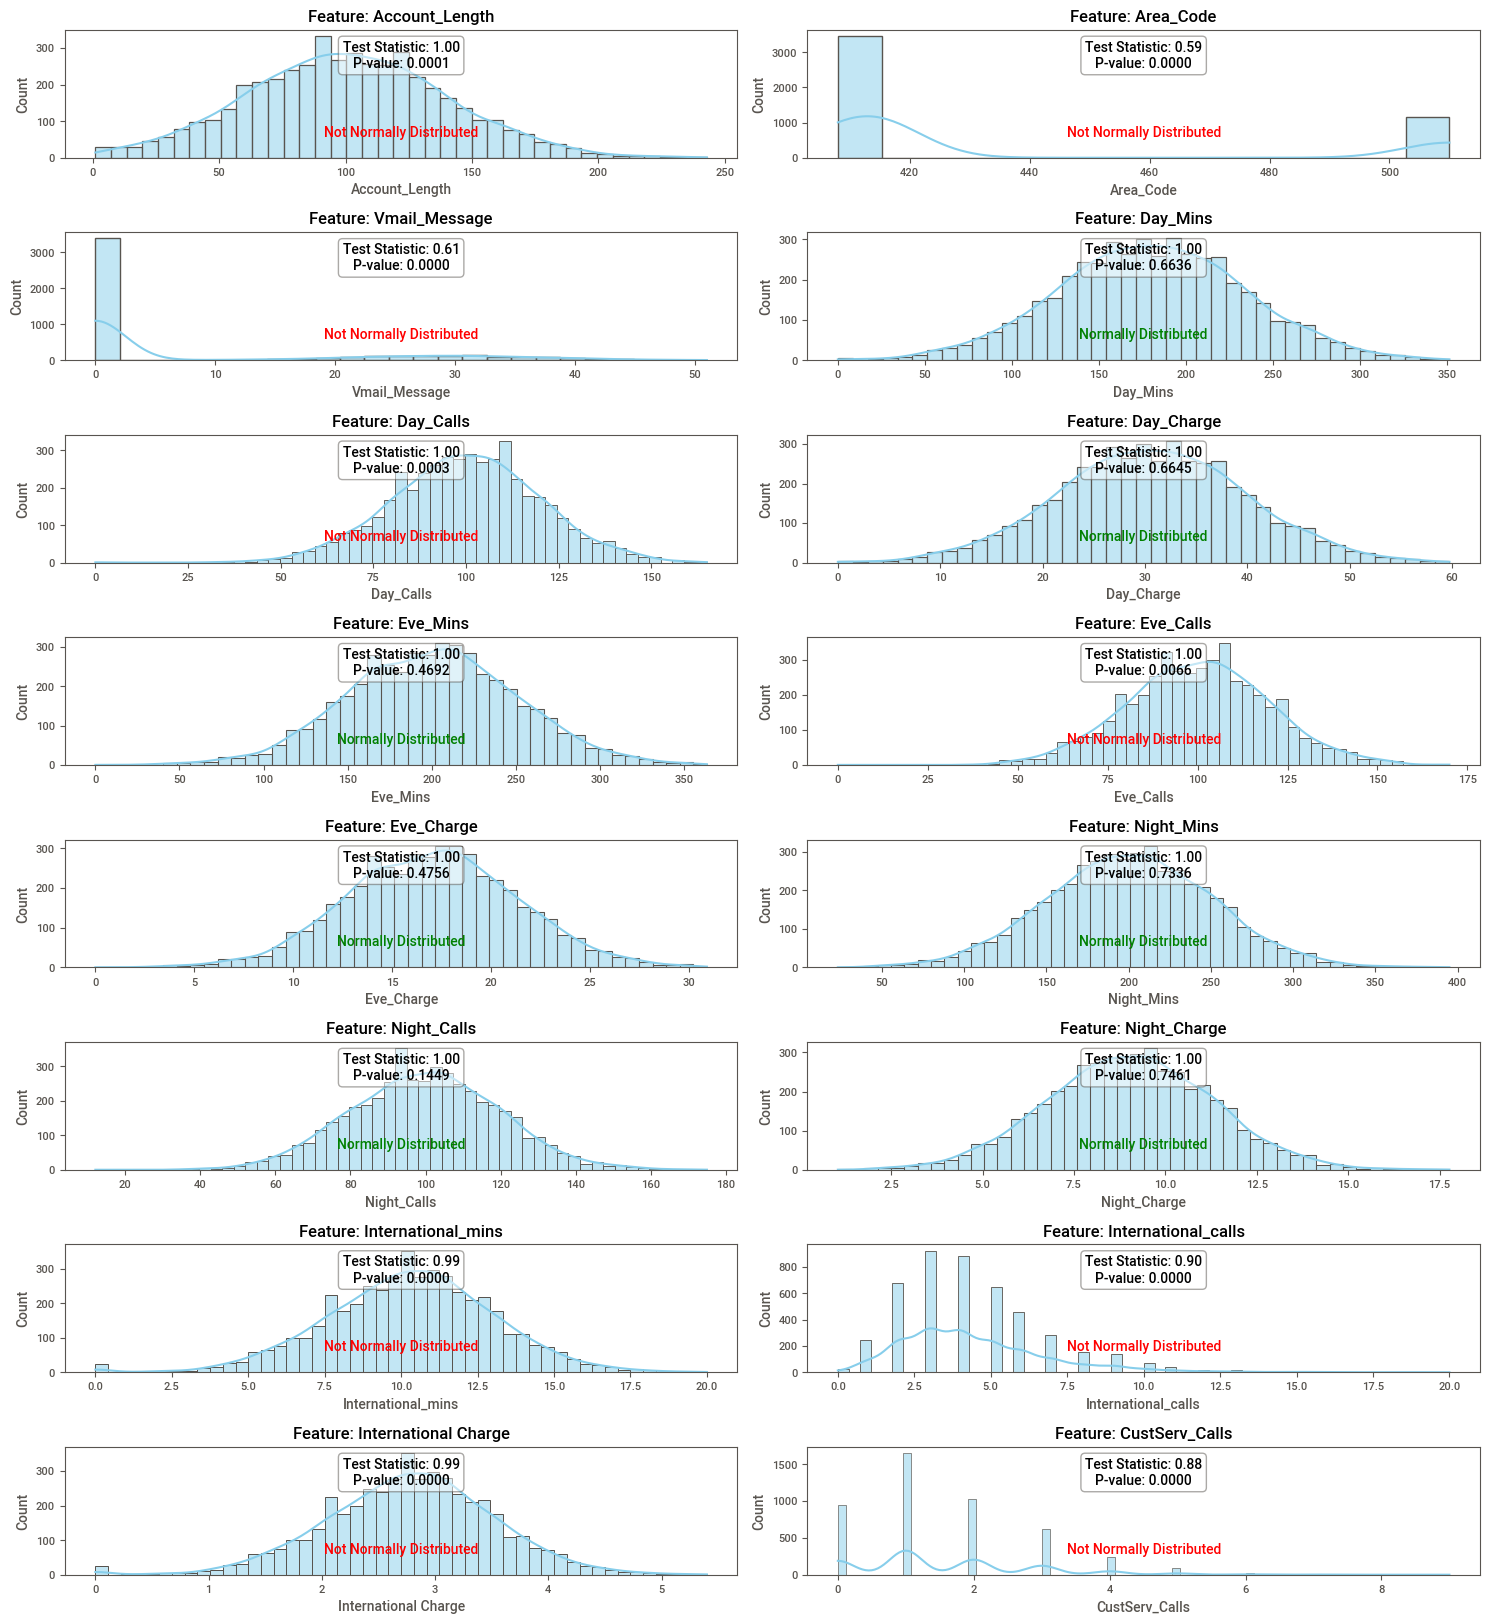

In [ ]:


plt.figure(figsize=(15, 20))
num = 1

for column in data.select_dtypes(include=['float64','int64']):
    if num <= 20:
        plt.subplot(10, 2, num)

        # Plot histogram with KDE
        sns.histplot(data[column], kde=True, color='skyblue')
        plt.title(f'Feature: {column}')

        # Check for normality using Shapiro-Wilk test
        stat, p = stats.shapiro(data[column])
        plt.text(0.5, 0.8, f"Test Statistic: {stat:.2f}\nP-value: {p:.4f}",
                 transform=plt.gca().transAxes,
                 ha='center', va='center', fontsize=10,
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

        if p > 0.05:
            plt.text(0.5, 0.2, "Normally Distributed",
                     transform=plt.gca().transAxes,
                     ha='center', va='center', fontsize=10,
                     color='green')
        else:
            plt.text(0.5, 0.2, "Not Normally Distributed",
                     transform=plt.gca().transAxes,
                     ha='center', va='center', fontsize=10,
                     color='red')

        num = num + 1

plt.tight_layout()
plt.show()

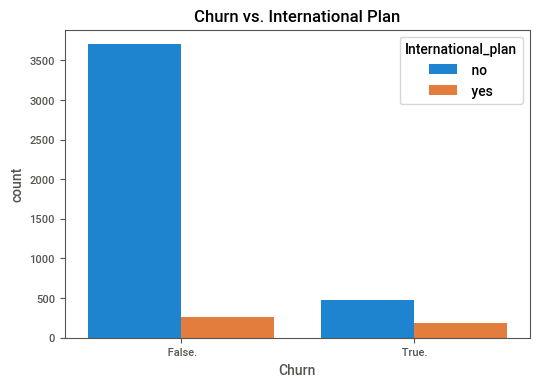

In [ ]:
# Bivariate analysis for 'Churn' and 'International_plan'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', hue='International_plan', data=data)
plt.title('Churn vs. International Plan')
plt.show()

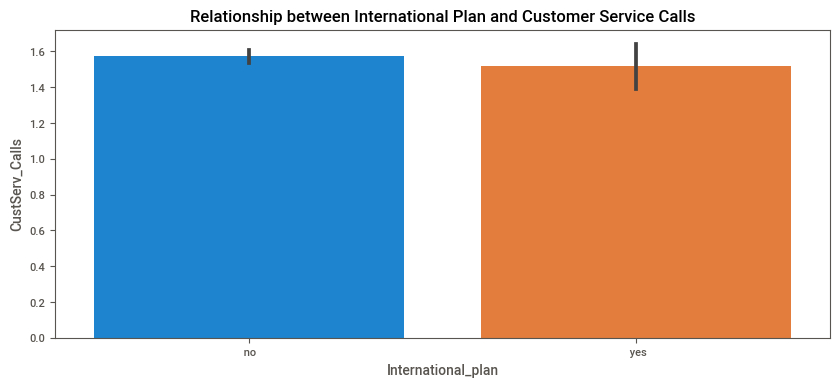

In [ ]:
#Relationship between 'International_plan' and 'CustServ_Calls'
plt.figure(figsize=(10, 4))
sns.barplot(x='International_plan', y='CustServ_Calls', data=data)
plt.title('Relationship between International Plan and Customer Service Calls')
plt.show()

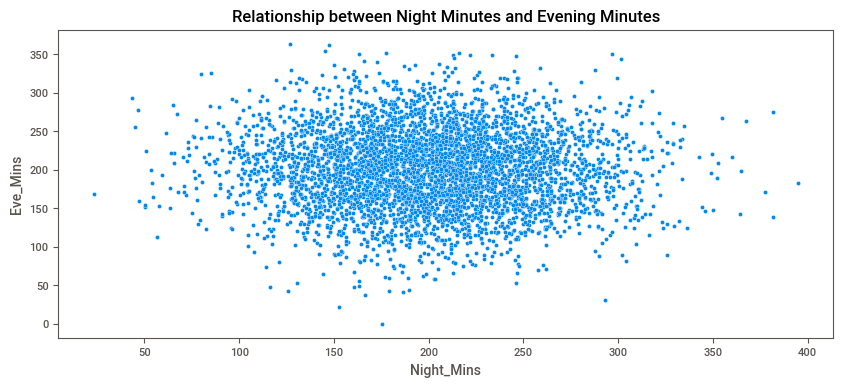

In [ ]:
#Relationship between 'Night_Mins' and 'Eve_Mins'
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Night_Mins', y='Eve_Mins', data=data)
plt.title('Relationship between Night Minutes and Evening Minutes')
plt.show()

<Figure size 1000x600 with 0 Axes>

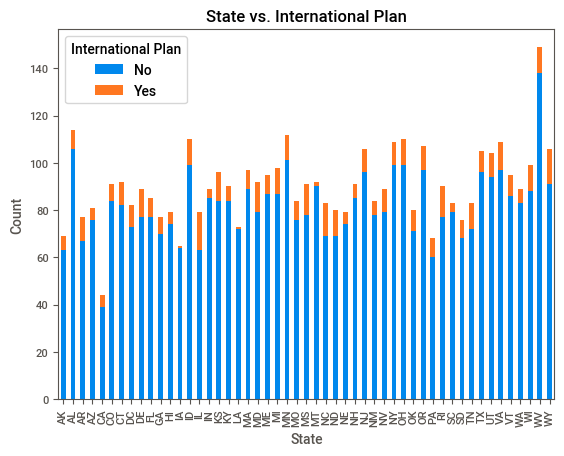

In [ ]:
# Create a cross-tabulation of 'State' and 'International_plan'
cross_tab = pd.crosstab(data['State'], data['International_plan'])

# Plot the cross-tabulation as a bar plot
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.title('State vs. International Plan')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='International Plan', labels=['No', 'Yes'])
plt.show()

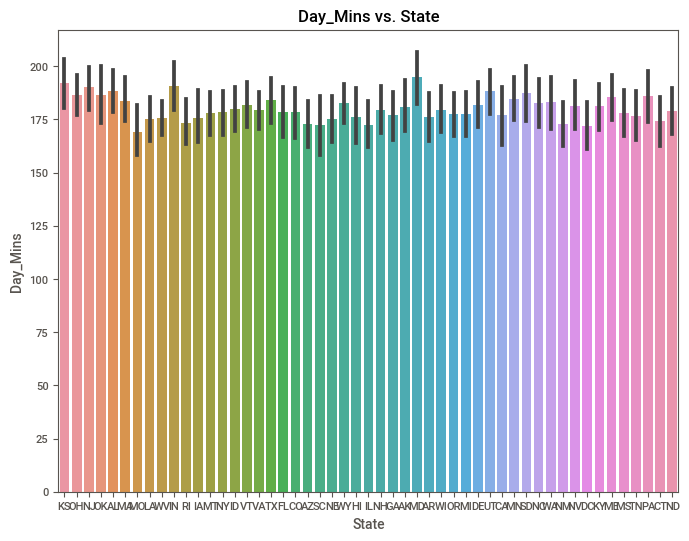

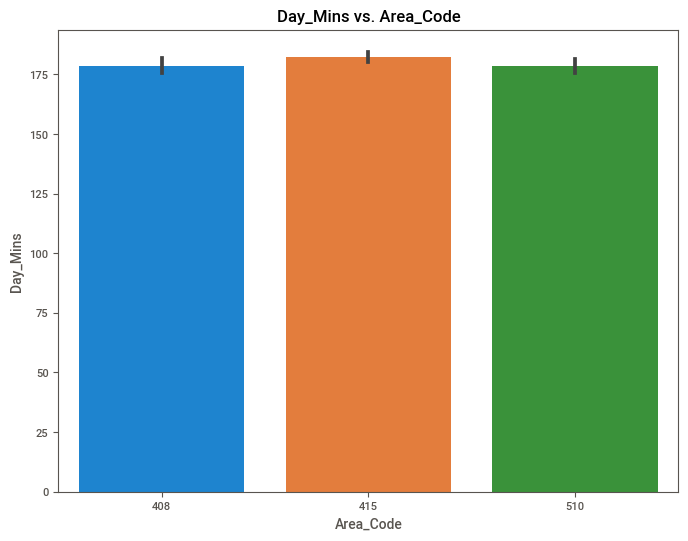

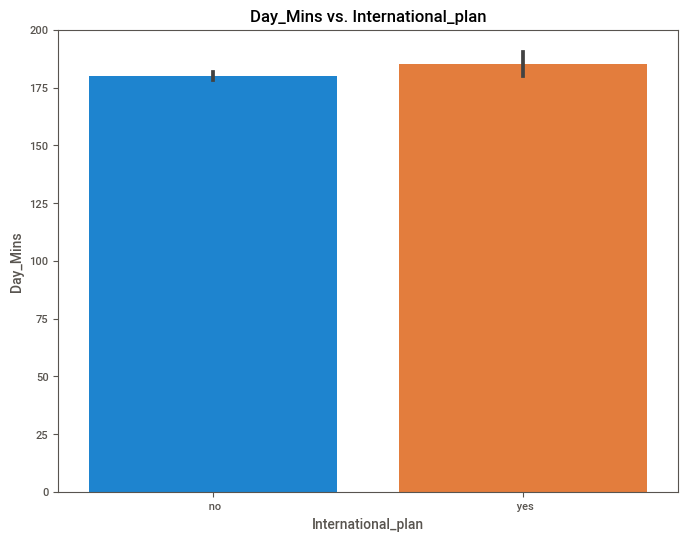

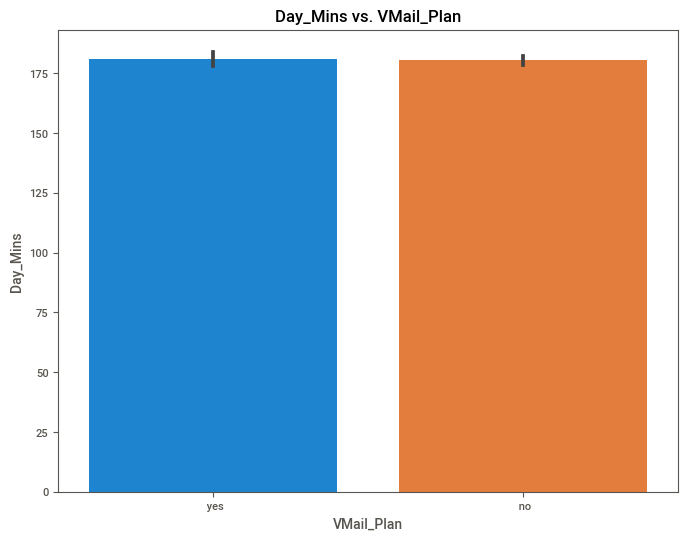

<Figure size 800x600 with 0 Axes>

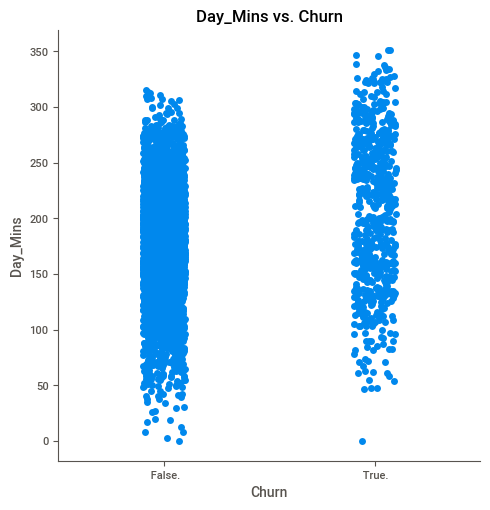

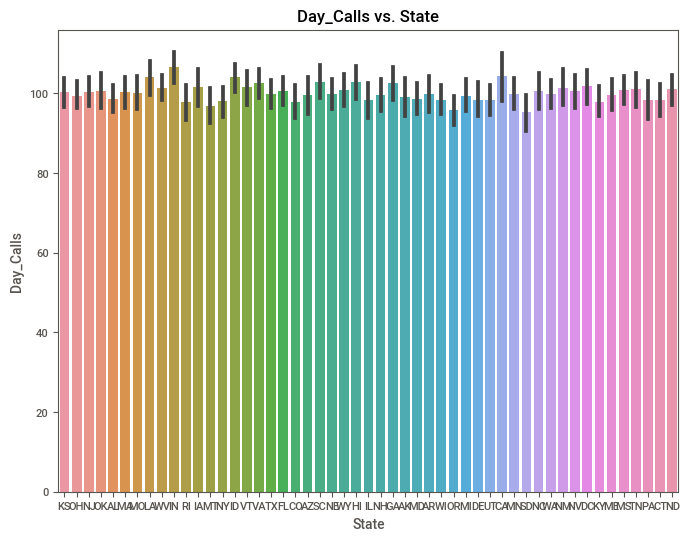

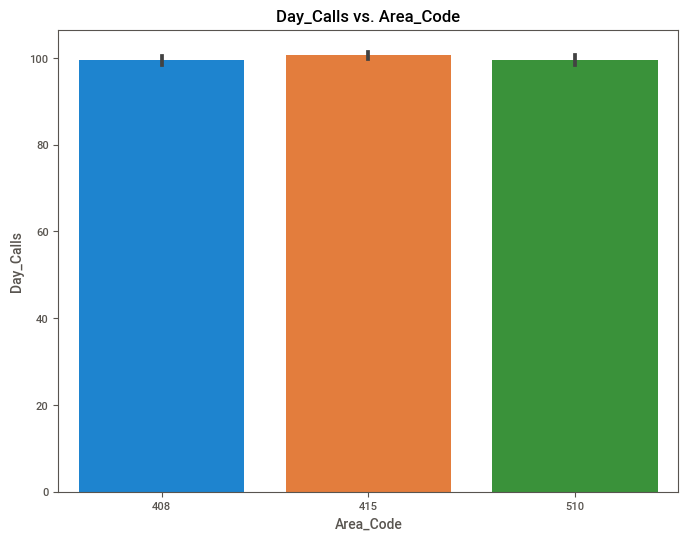

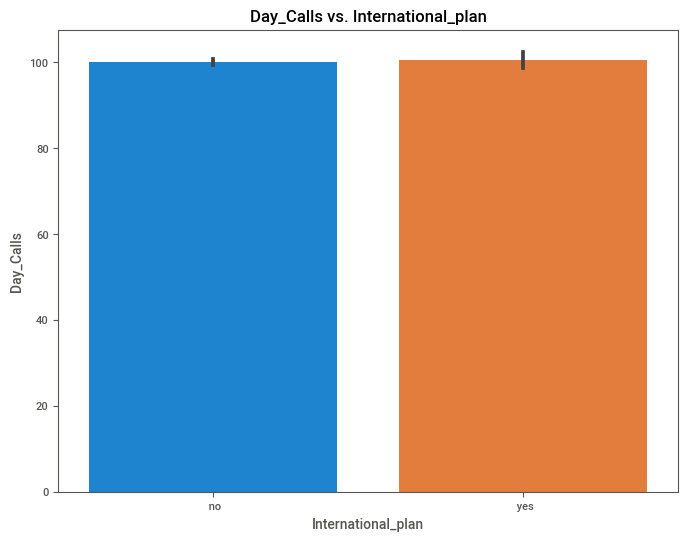

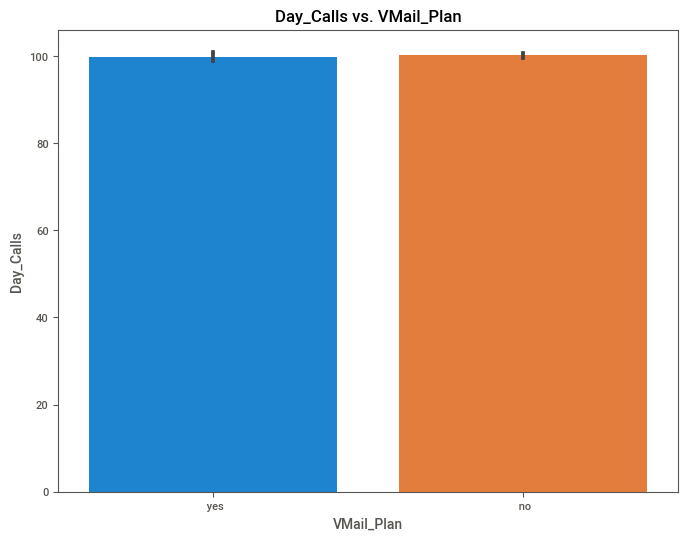

<Figure size 800x600 with 0 Axes>

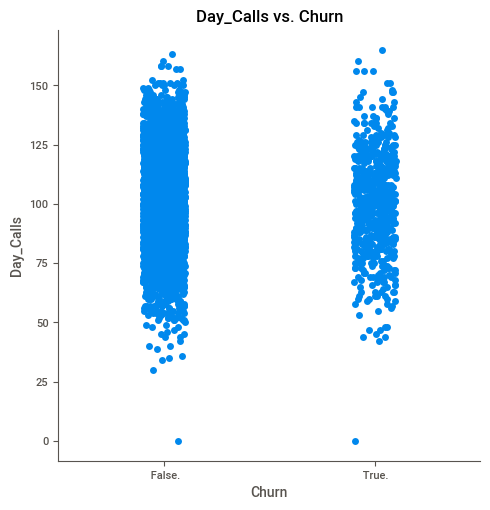

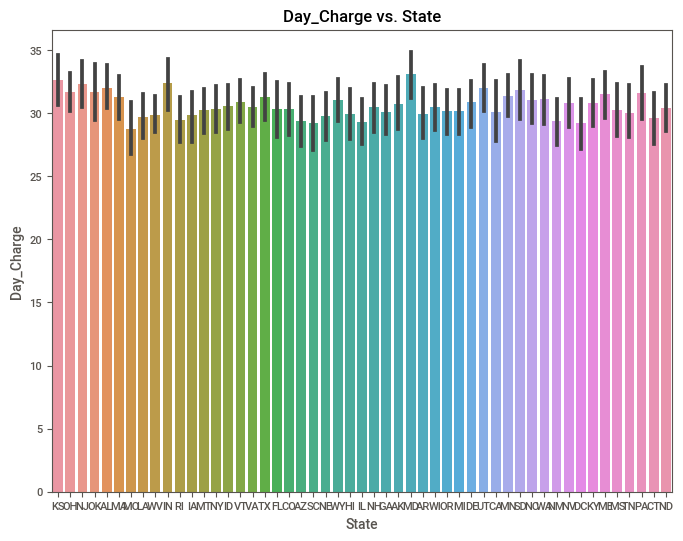

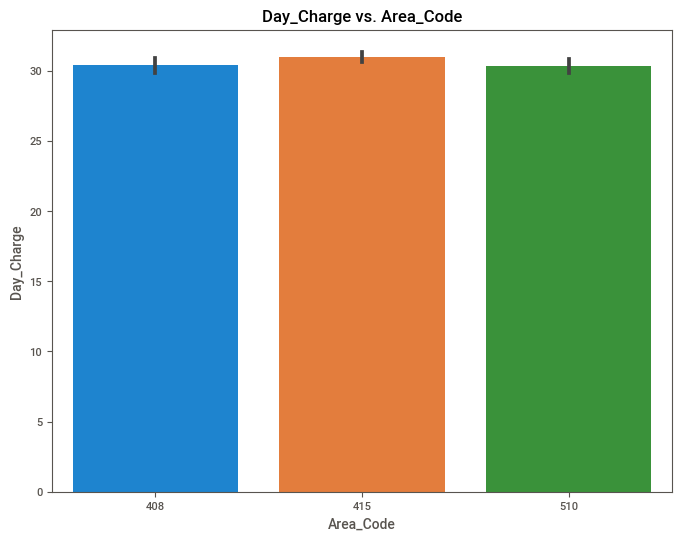

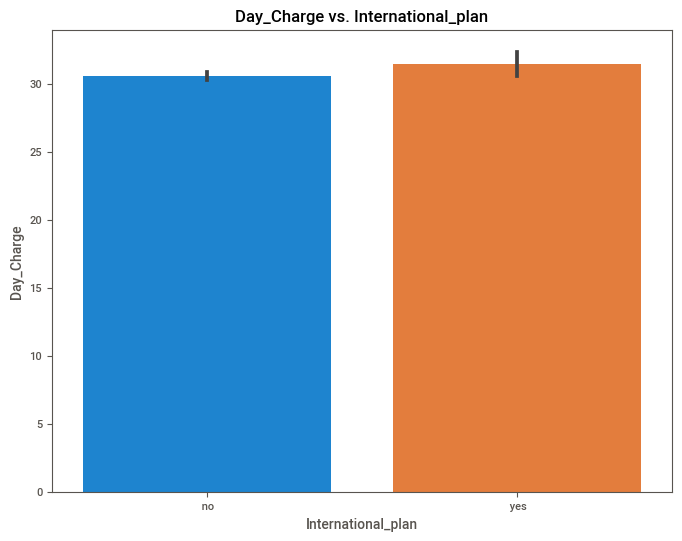

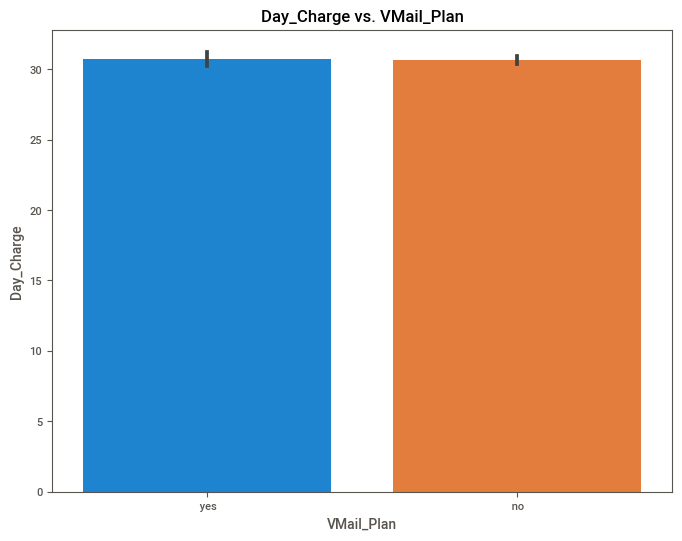

<Figure size 800x600 with 0 Axes>

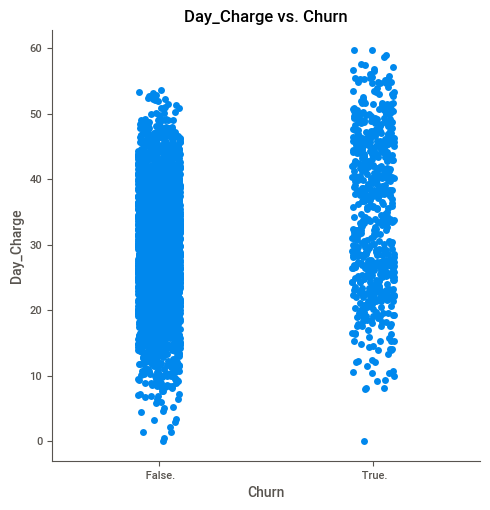

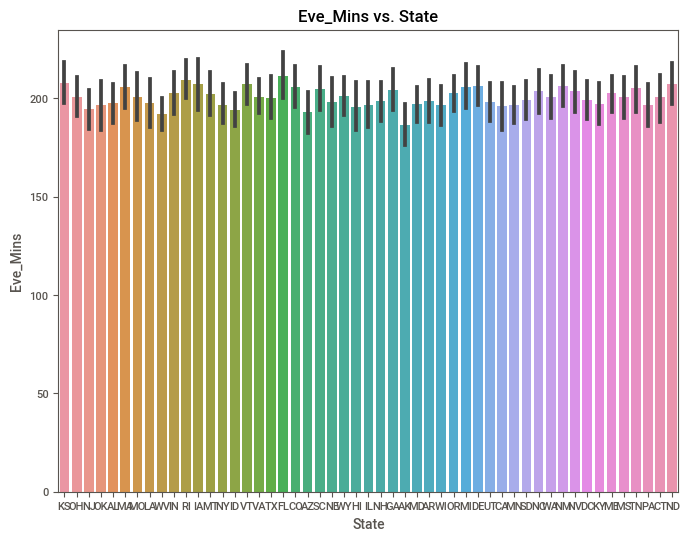

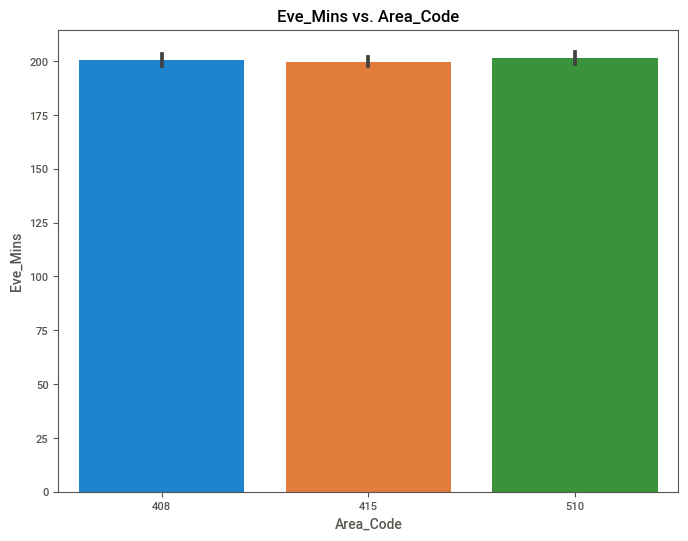

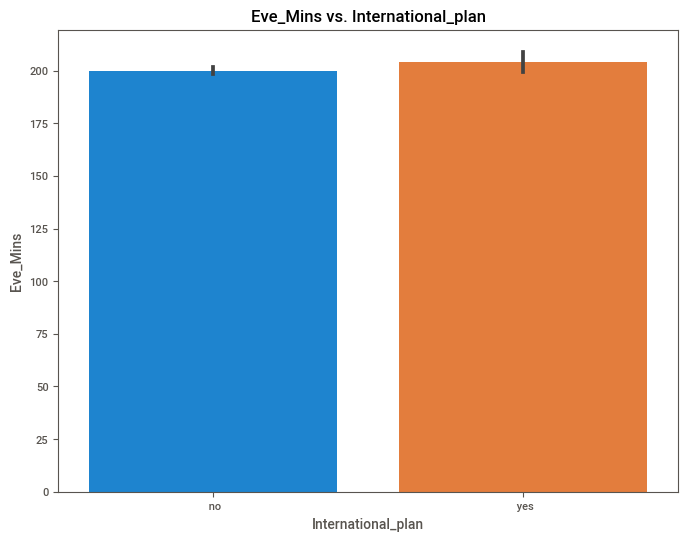

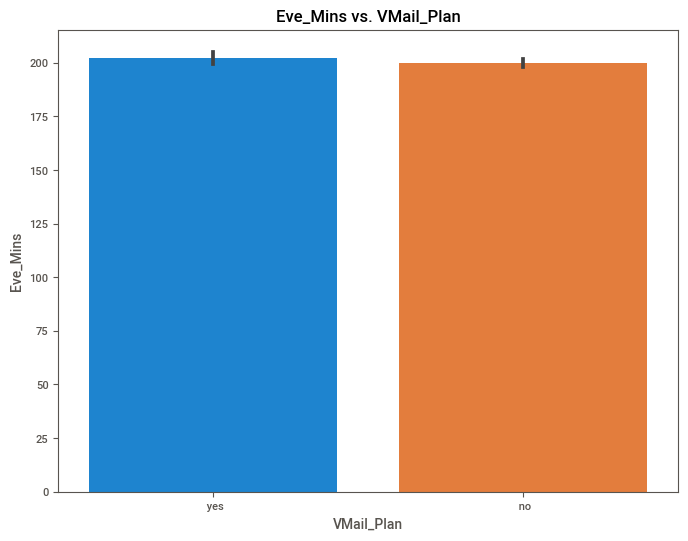

<Figure size 800x600 with 0 Axes>

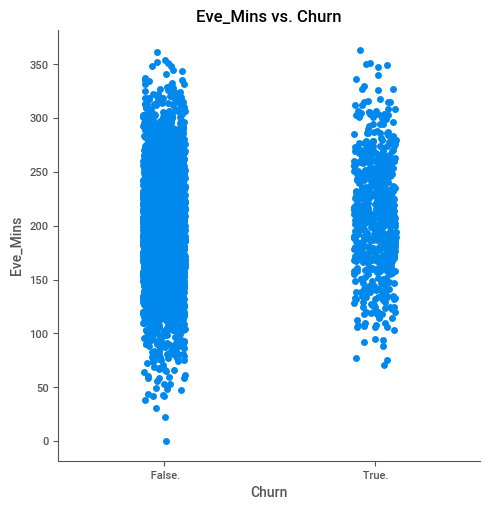

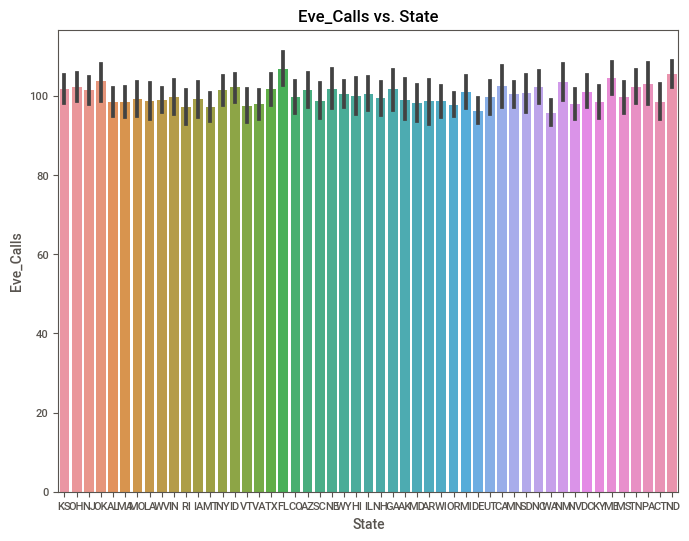

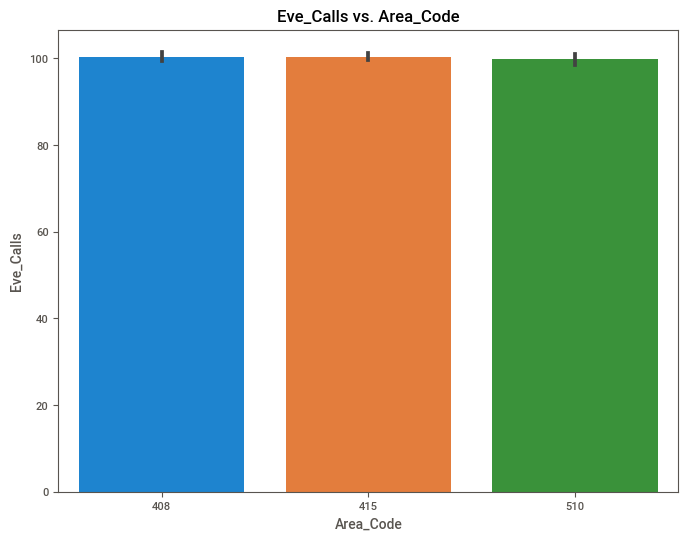

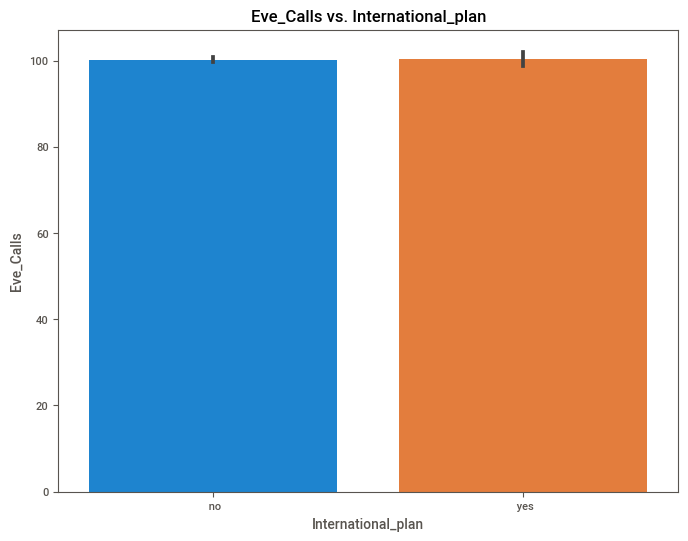

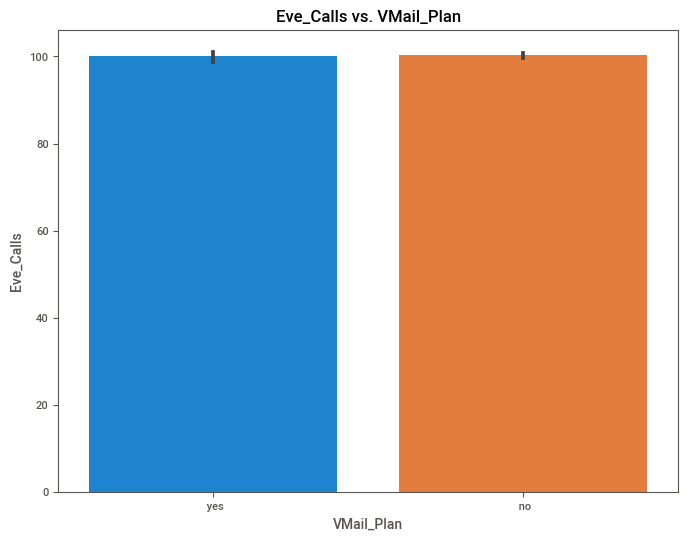

<Figure size 800x600 with 0 Axes>

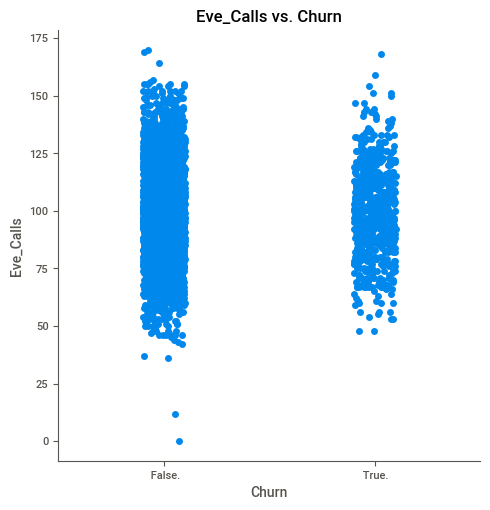

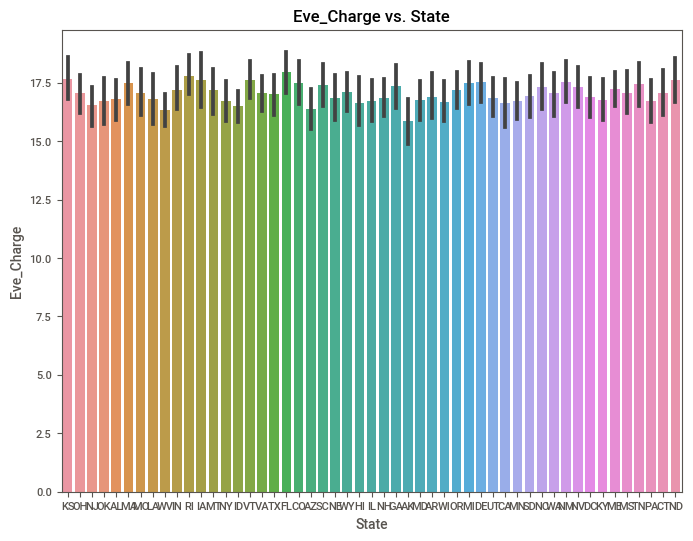

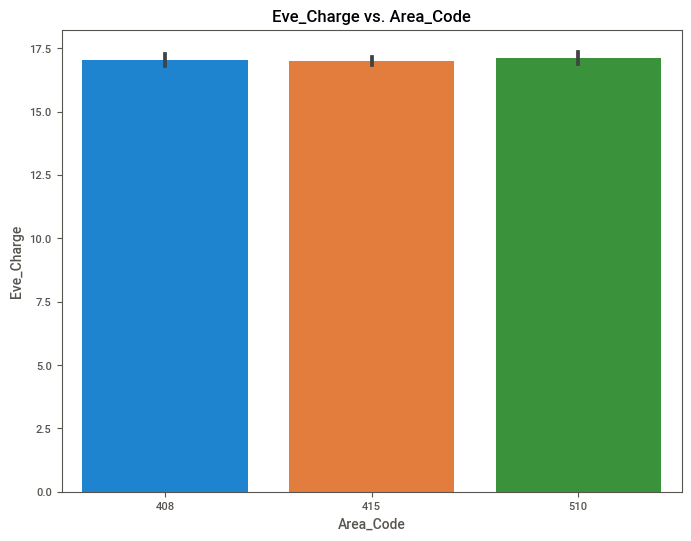

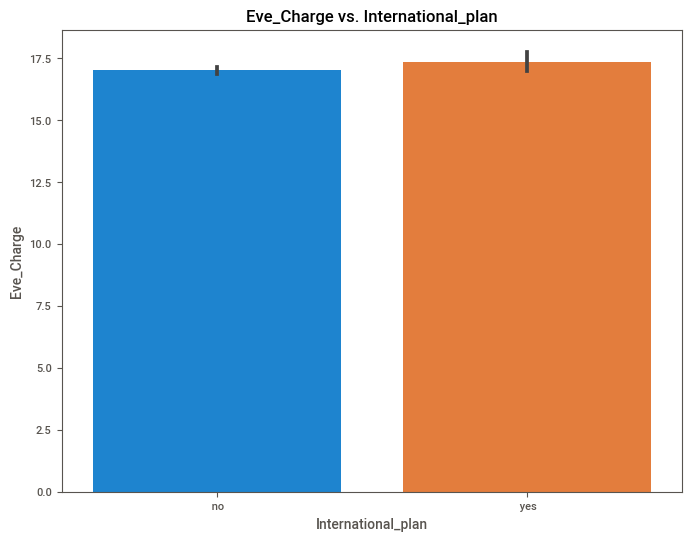

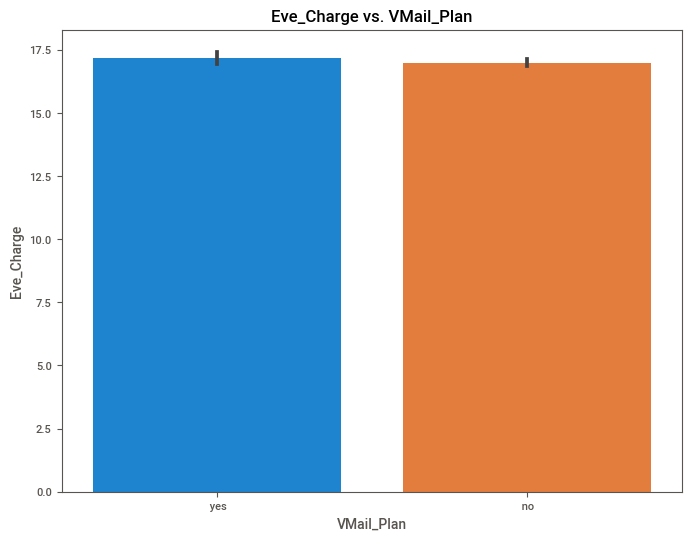

<Figure size 800x600 with 0 Axes>

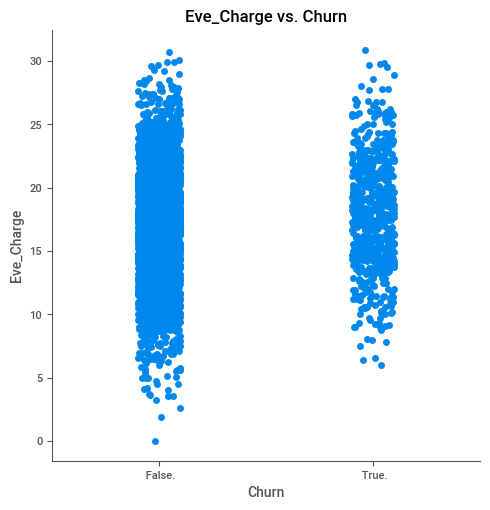

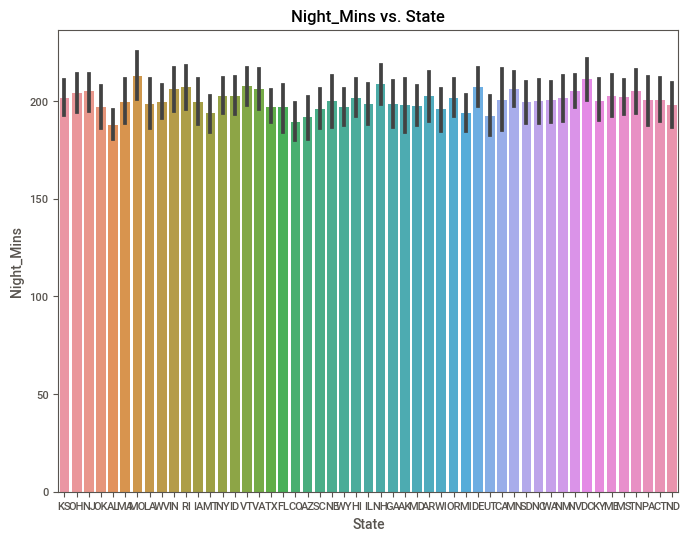

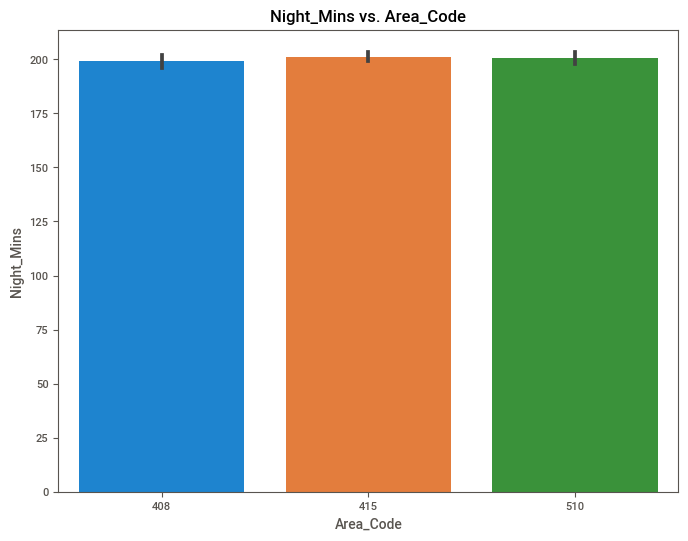

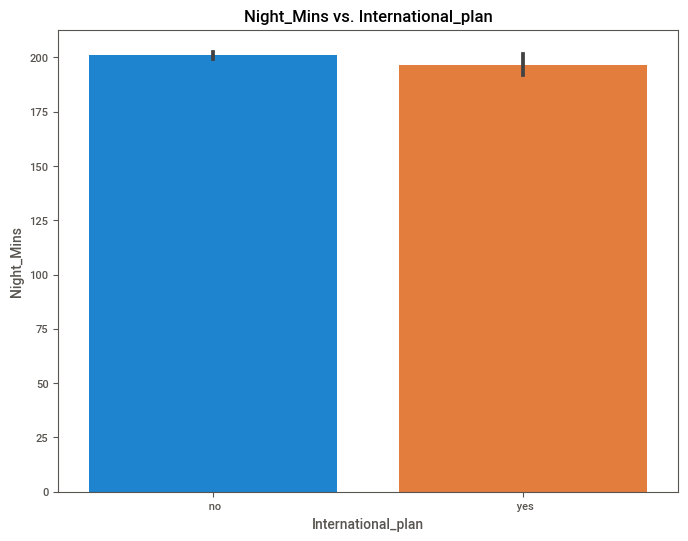

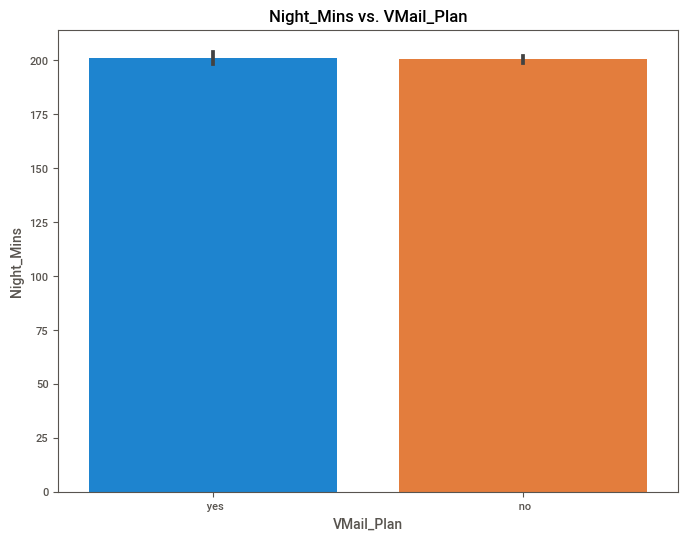

<Figure size 800x600 with 0 Axes>

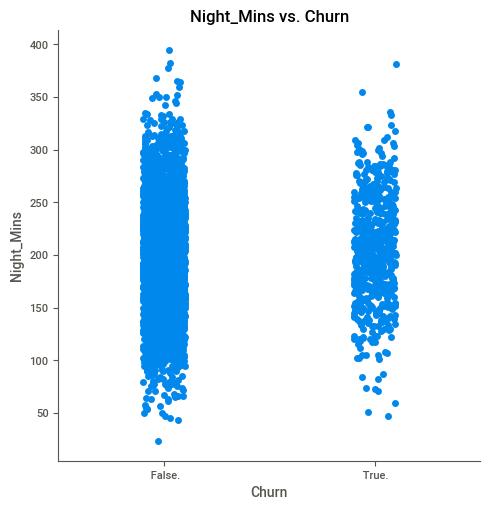

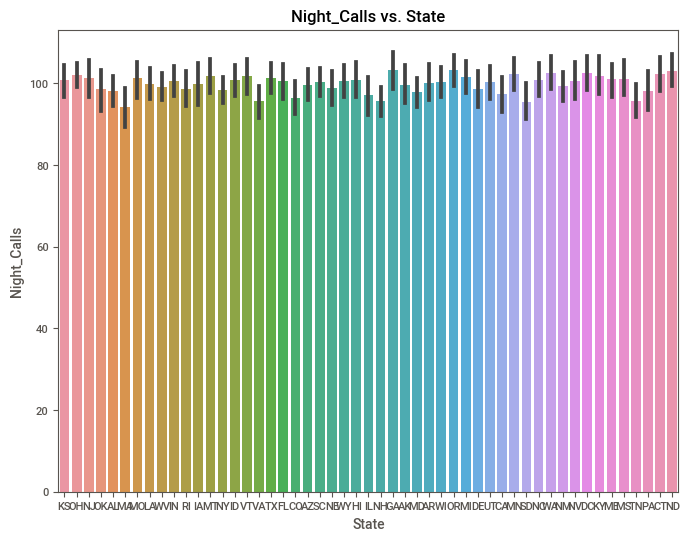

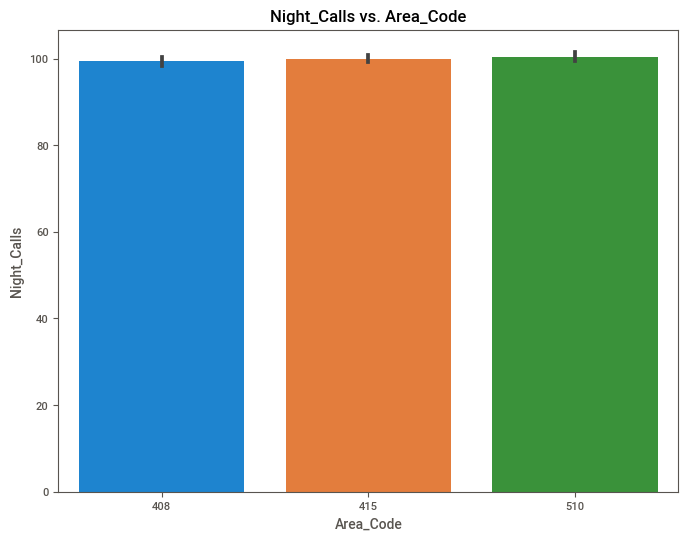

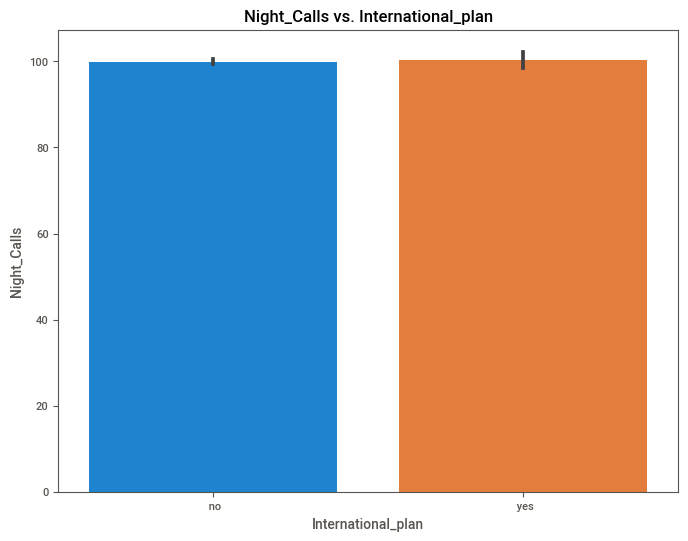

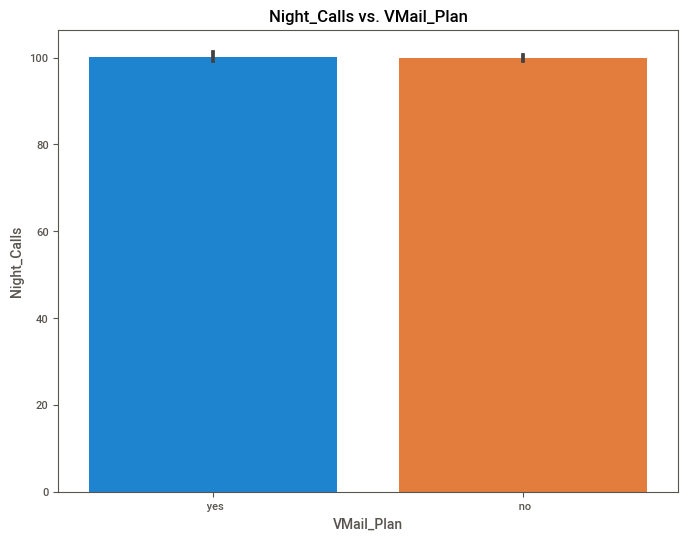

<Figure size 800x600 with 0 Axes>

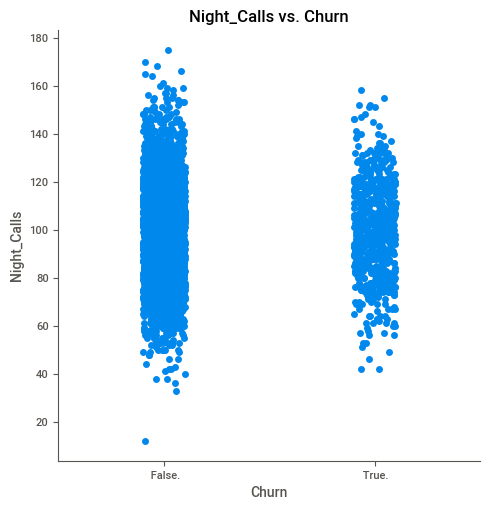

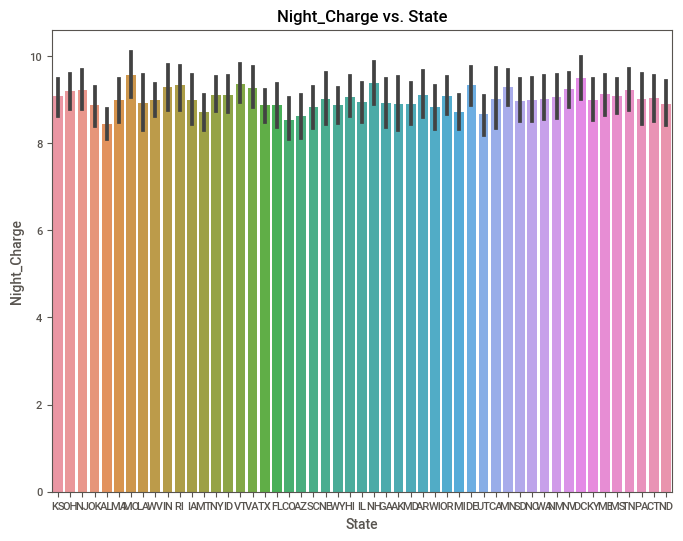

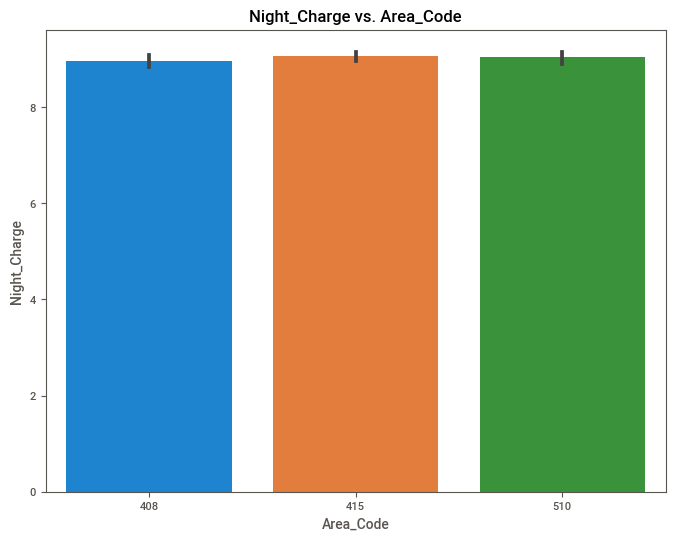

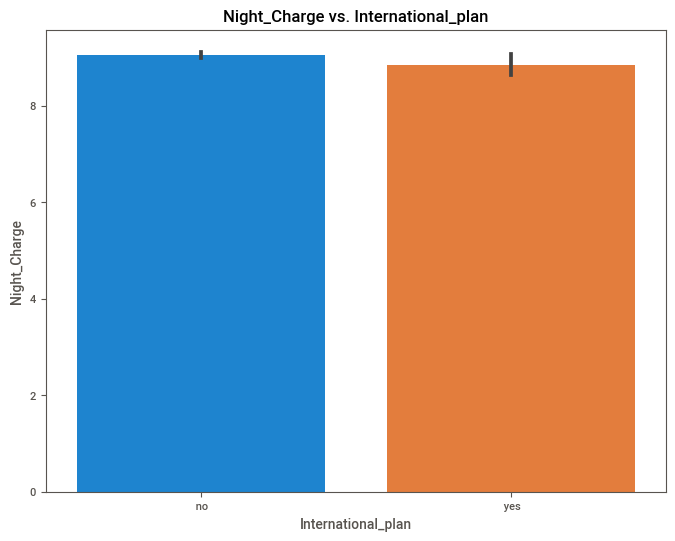

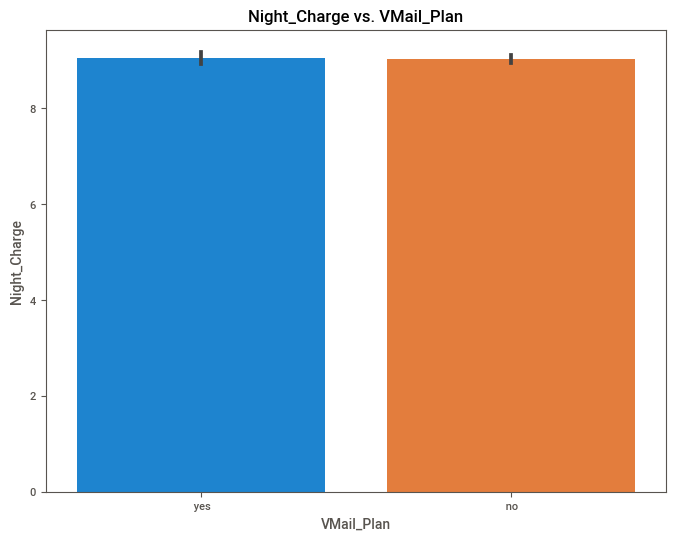

<Figure size 800x600 with 0 Axes>

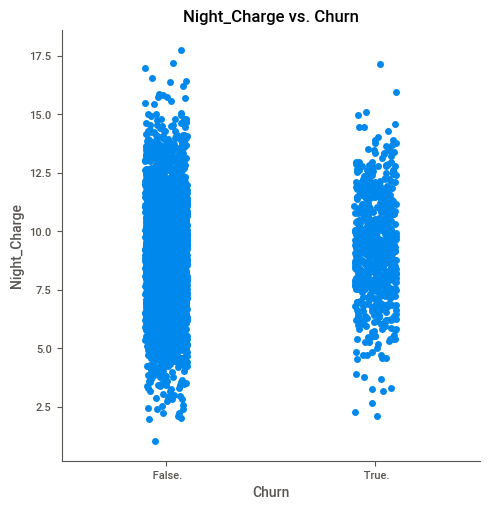

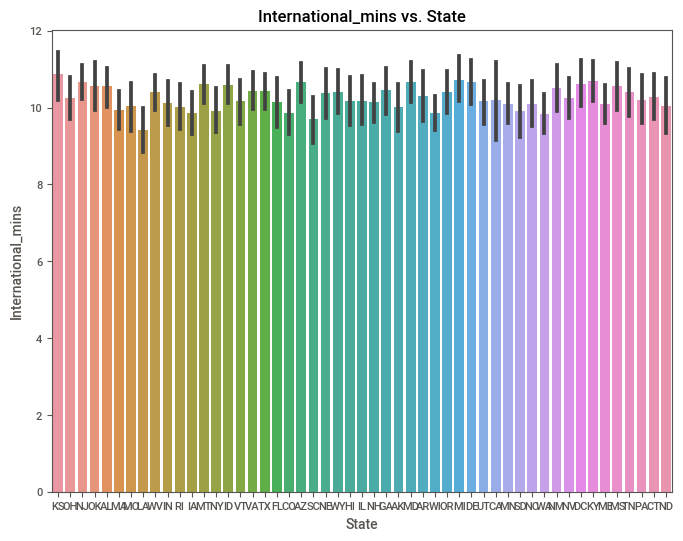

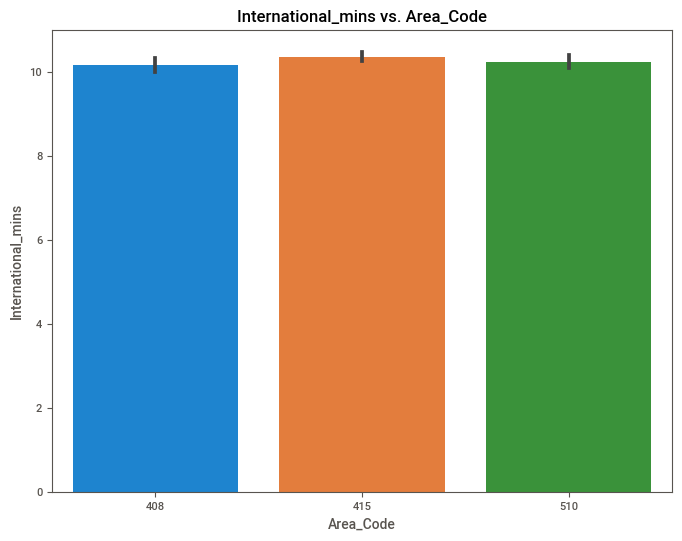

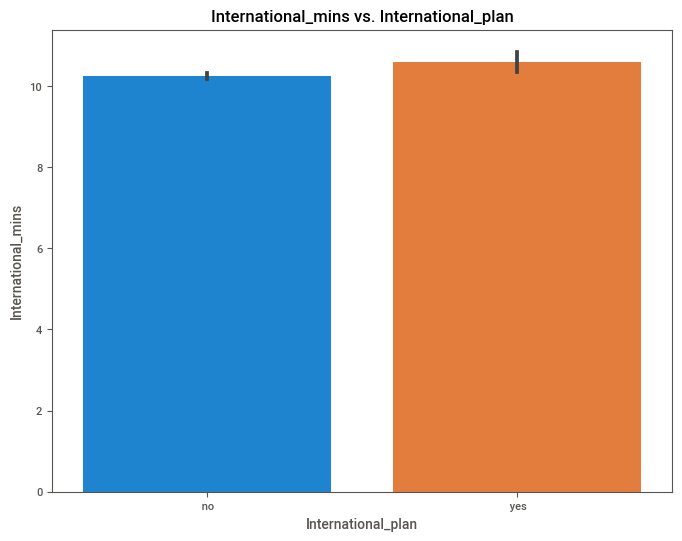

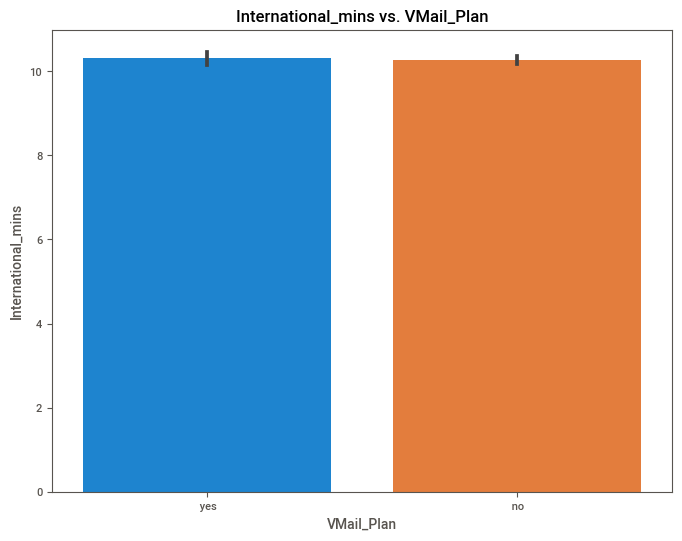

<Figure size 800x600 with 0 Axes>

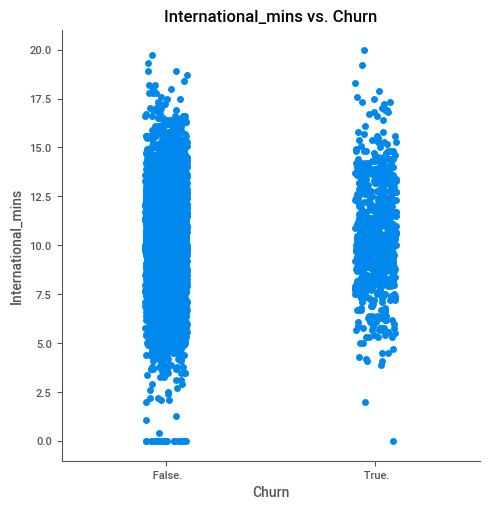

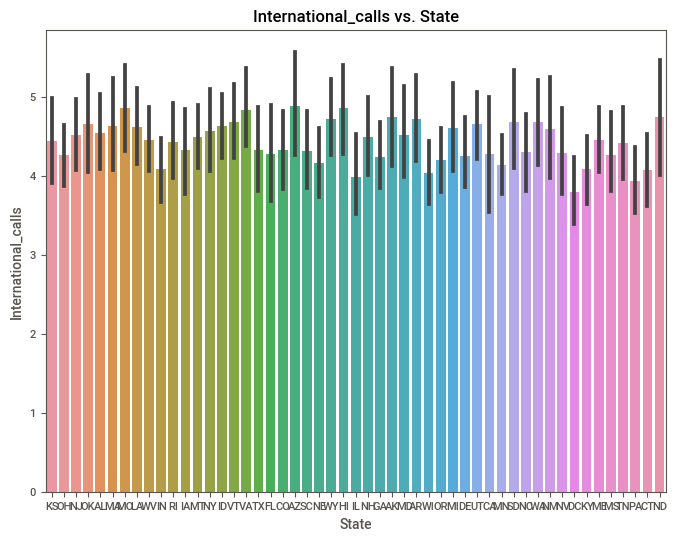

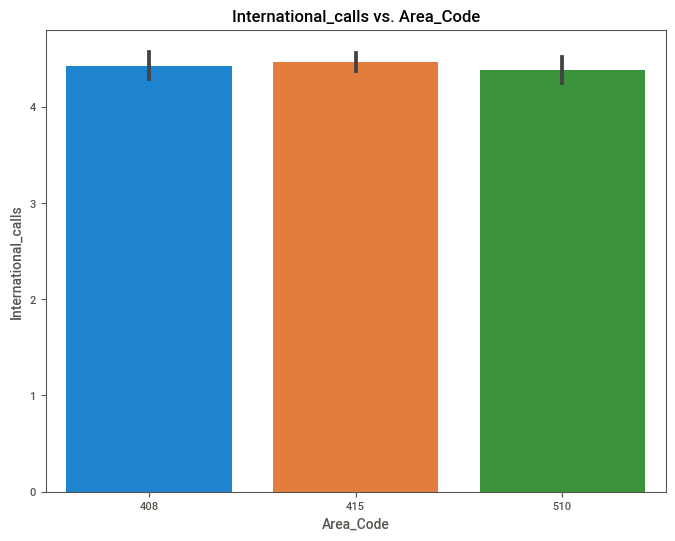

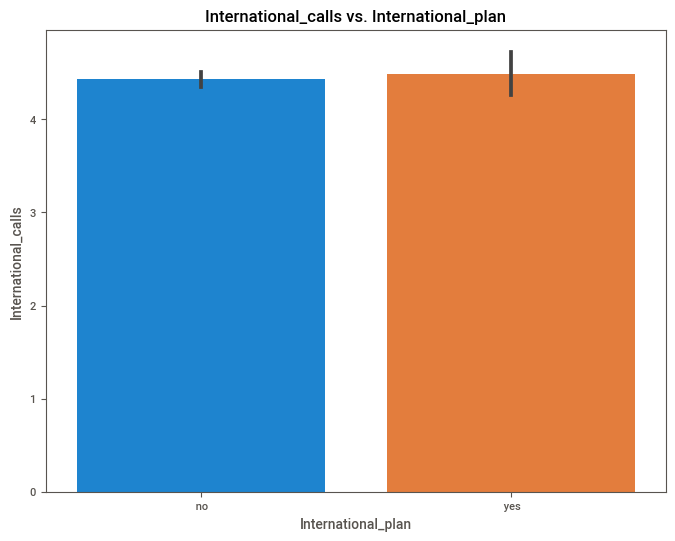

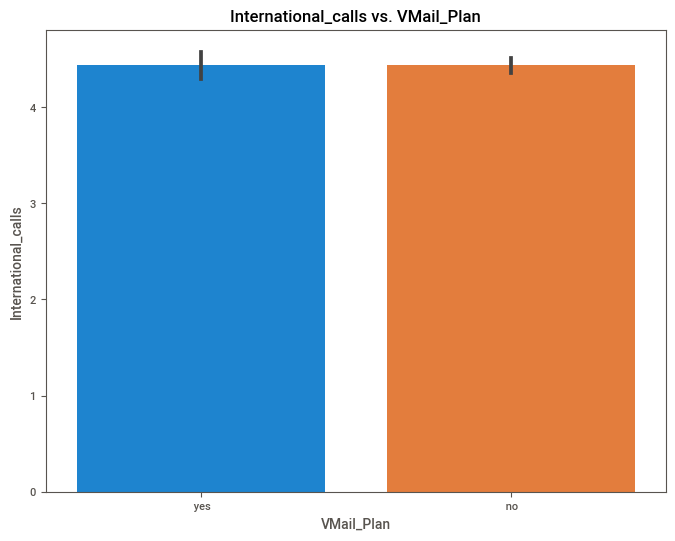

<Figure size 800x600 with 0 Axes>

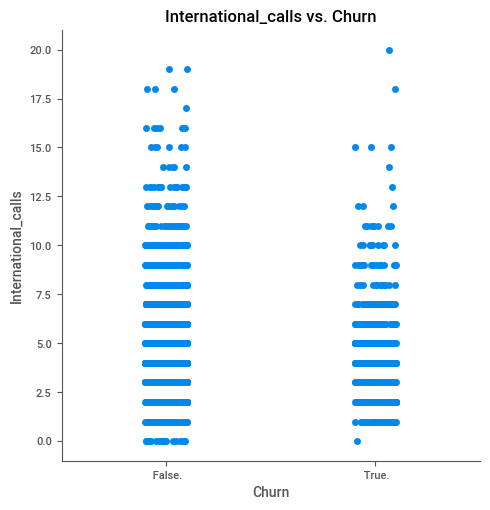

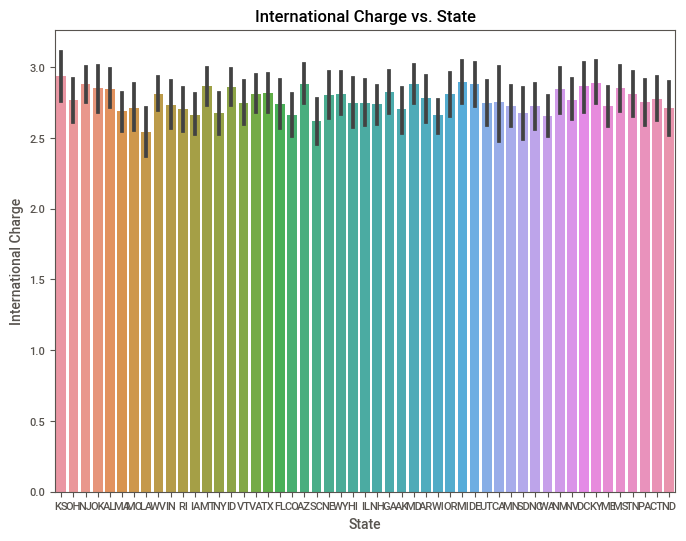

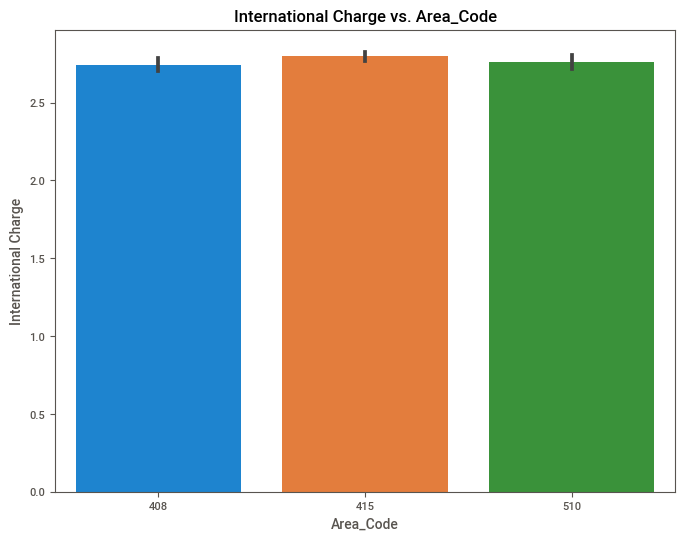

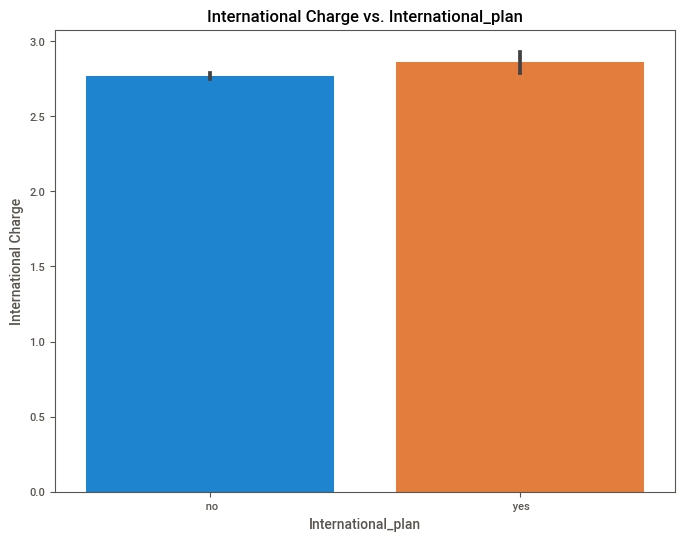

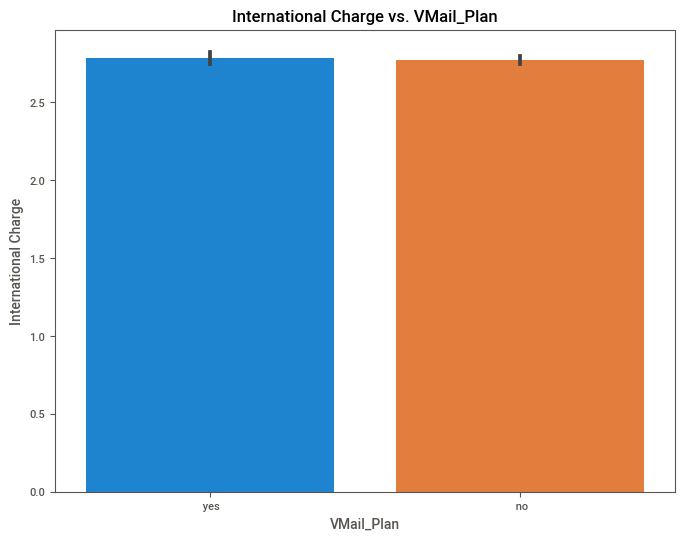

<Figure size 800x600 with 0 Axes>

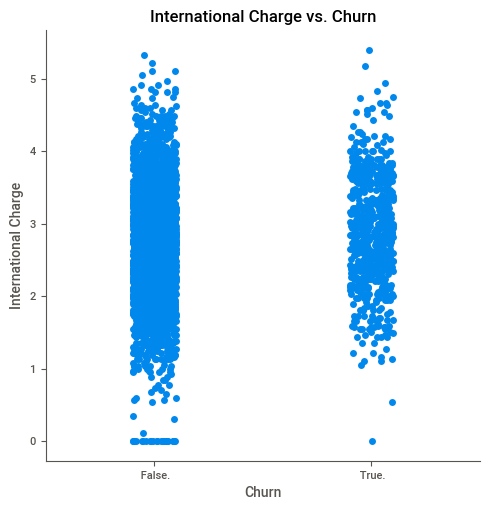

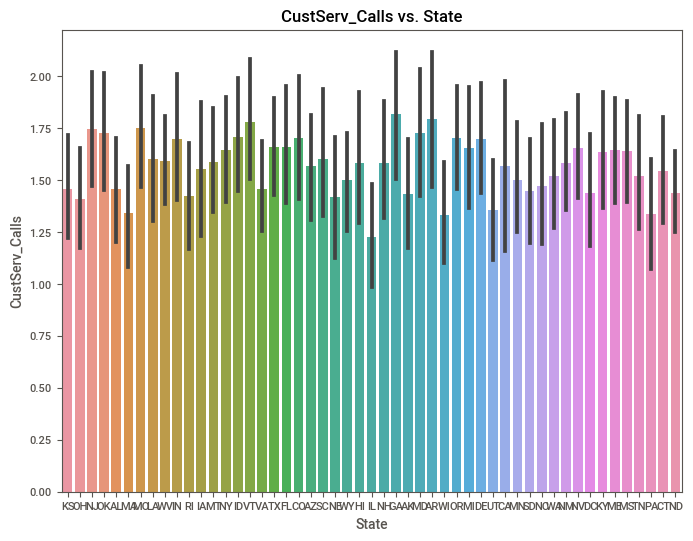

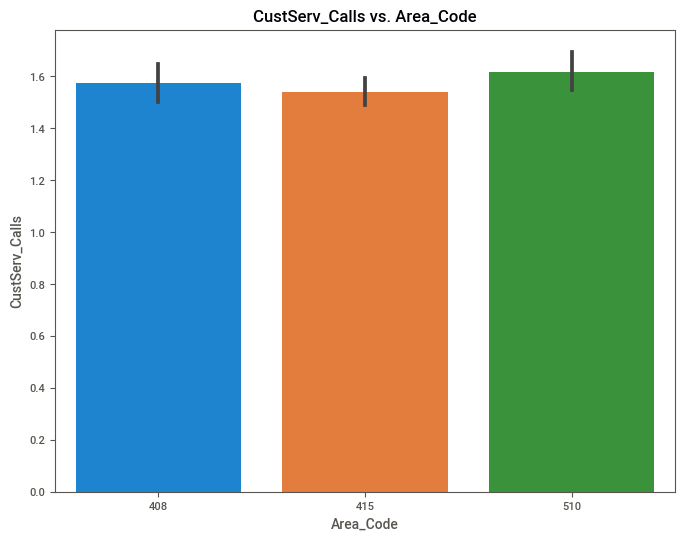

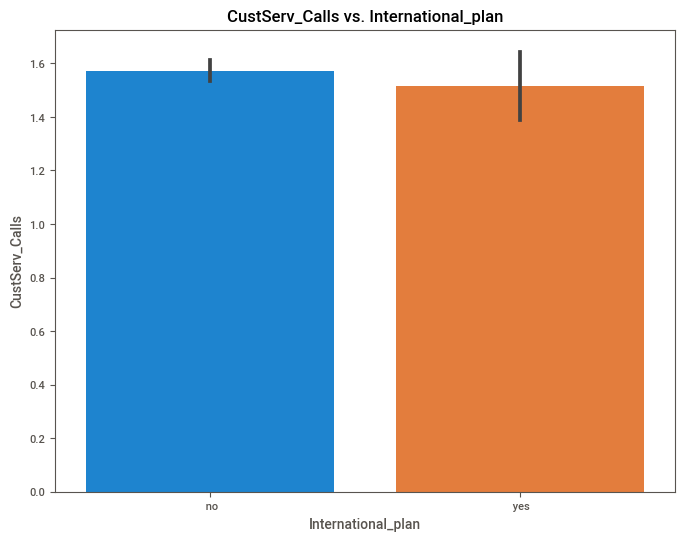

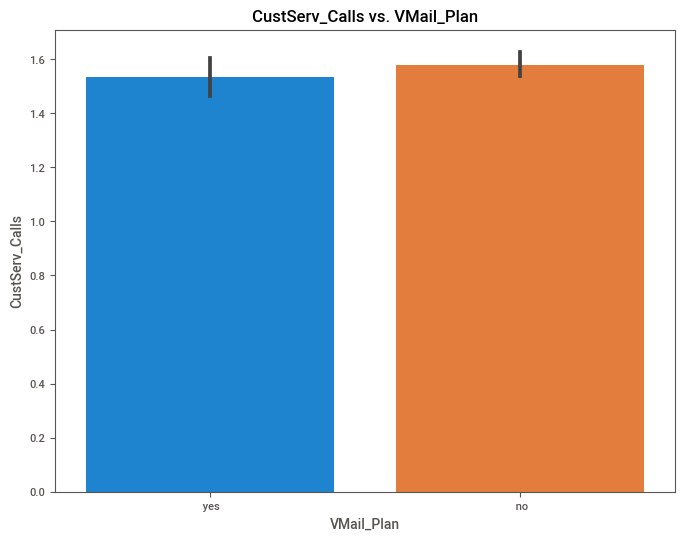

<Figure size 800x600 with 0 Axes>

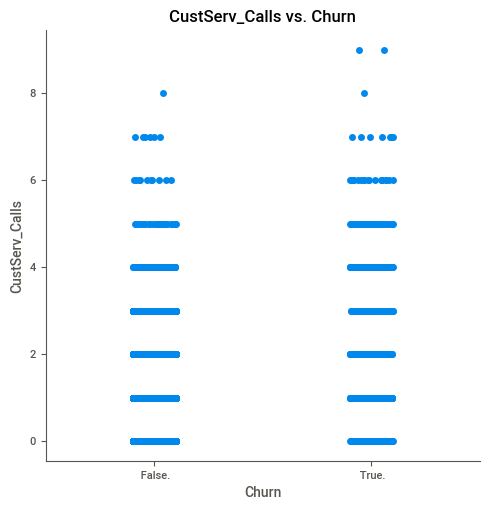

In [ ]:
# Create a list of numerical and categorical variables
numerical_vars = ['Day_Mins', 'Day_Calls', 'Day_Charge',
                  'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
                  'Night_Charge', 'International_mins', 'International_calls', 'International Charge',
                  'CustServ_Calls']
categorical_vars = ['State', 'Area_Code', 'International_plan', 'VMail_Plan', 'Churn']

# Loop through numerical variables for bivariate analysis
for num_var in numerical_vars:
    for cat_var in categorical_vars:
        if num_var != cat_var:
            plt.figure(figsize=(8, 6))
            if cat_var == 'Churn':
                sns.catplot(x=cat_var, y=num_var, data=data)
                plt.title(f'{num_var} vs. {cat_var}')
            else:
                sns.barplot(x=cat_var, y=num_var, data=data)
                plt.title(f'{num_var} vs. {cat_var}')
            plt.show()

## Churn Analysis:

In [ ]:
# Churn distribution
churn_distribution = data['Churn'].value_counts()

# Churn percentage
churn_percentage = data['Churn'].value_counts(normalize=True) * 100

print("\nChurn Distribution:")
print(churn_distribution)

print("\nChurn Percentage:")
print(churn_percentage)



Churn Distribution:
 False.    3961
 True.      656
Name: Churn, dtype: int64

Churn Percentage:
 False.    85.79164
 True.     14.20836
Name: Churn, dtype: float64


## Feature Selection

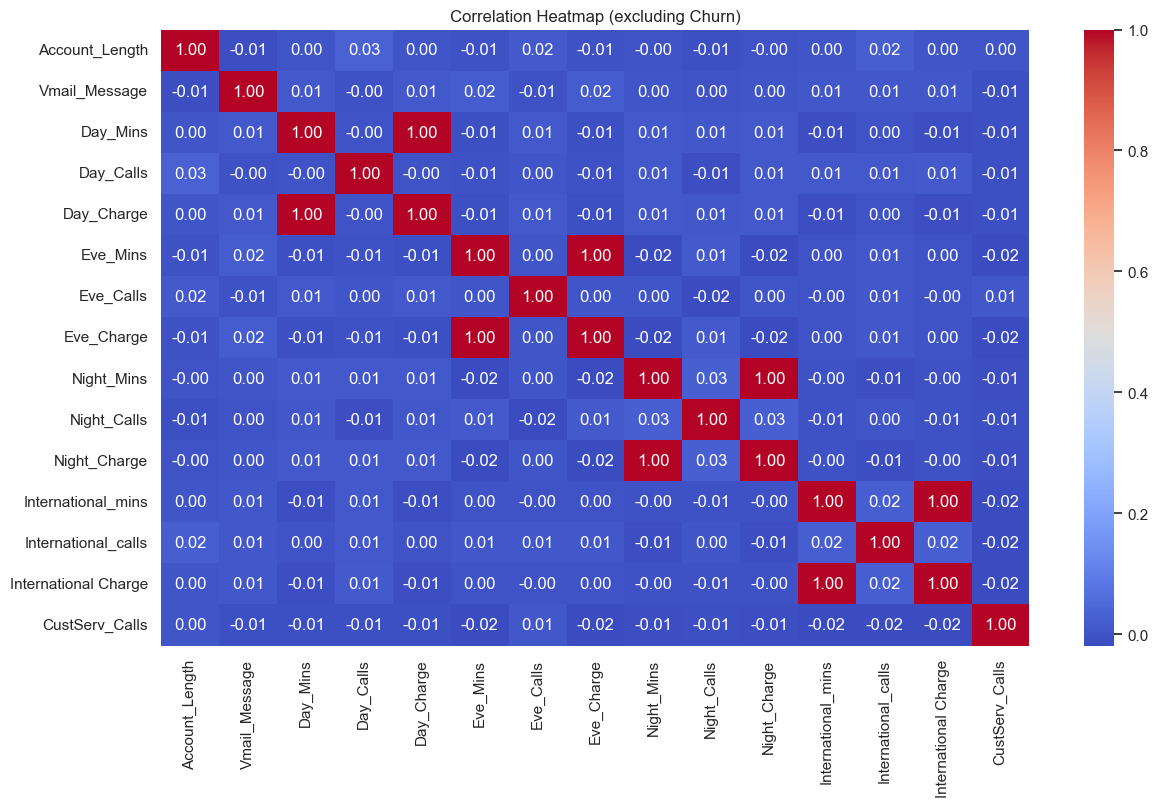

In [ ]:
# Select relevant features (excluding the target variable 'Churn')
features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
            'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
            'Night_Charge', 'International_mins', 'International_calls', 'International Charge',
            'CustServ_Calls']

# Calculate correlation coefficients
correlation_matrix = data[features].corr()

# Sort features based on their correlation with each other
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap (excluding Churn)')
plt.show()

In [ ]:
# Set a threshold for high correlation
threshold = 0.9  # You can adjust this threshold based on your preferences

# Find highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Remove one feature from each highly correlated pair
features_to_remove = set()
for pair in high_corr_pairs:
    features_to_remove.add(pair[1])

# Create a new dataset without the highly correlated features
filtered_data = data.drop(columns=features_to_remove)

# Display the removed features
print("Removed Features:", features_to_remove)

# Display the new dataset
filtered_data.head()

Removed Features: {'Day_Charge', 'Eve_Charge', 'Night_Charge', 'International Charge'}


,State,Account_Length,Area_Code,Phone,International_plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_mins,International_calls,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.


## Data Preprocessing

In [ ]:
data.isnull().sum()

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_plan      0
VMail_Plan              0
Vmail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_mins      0
International_calls     0
International Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

<b>There is no null value exist in the dataset</b>

<h3>Handlign Corrupt Values</h3>

<b>There is no corrupt value exist in the dataset</b>

# Handling Outliers

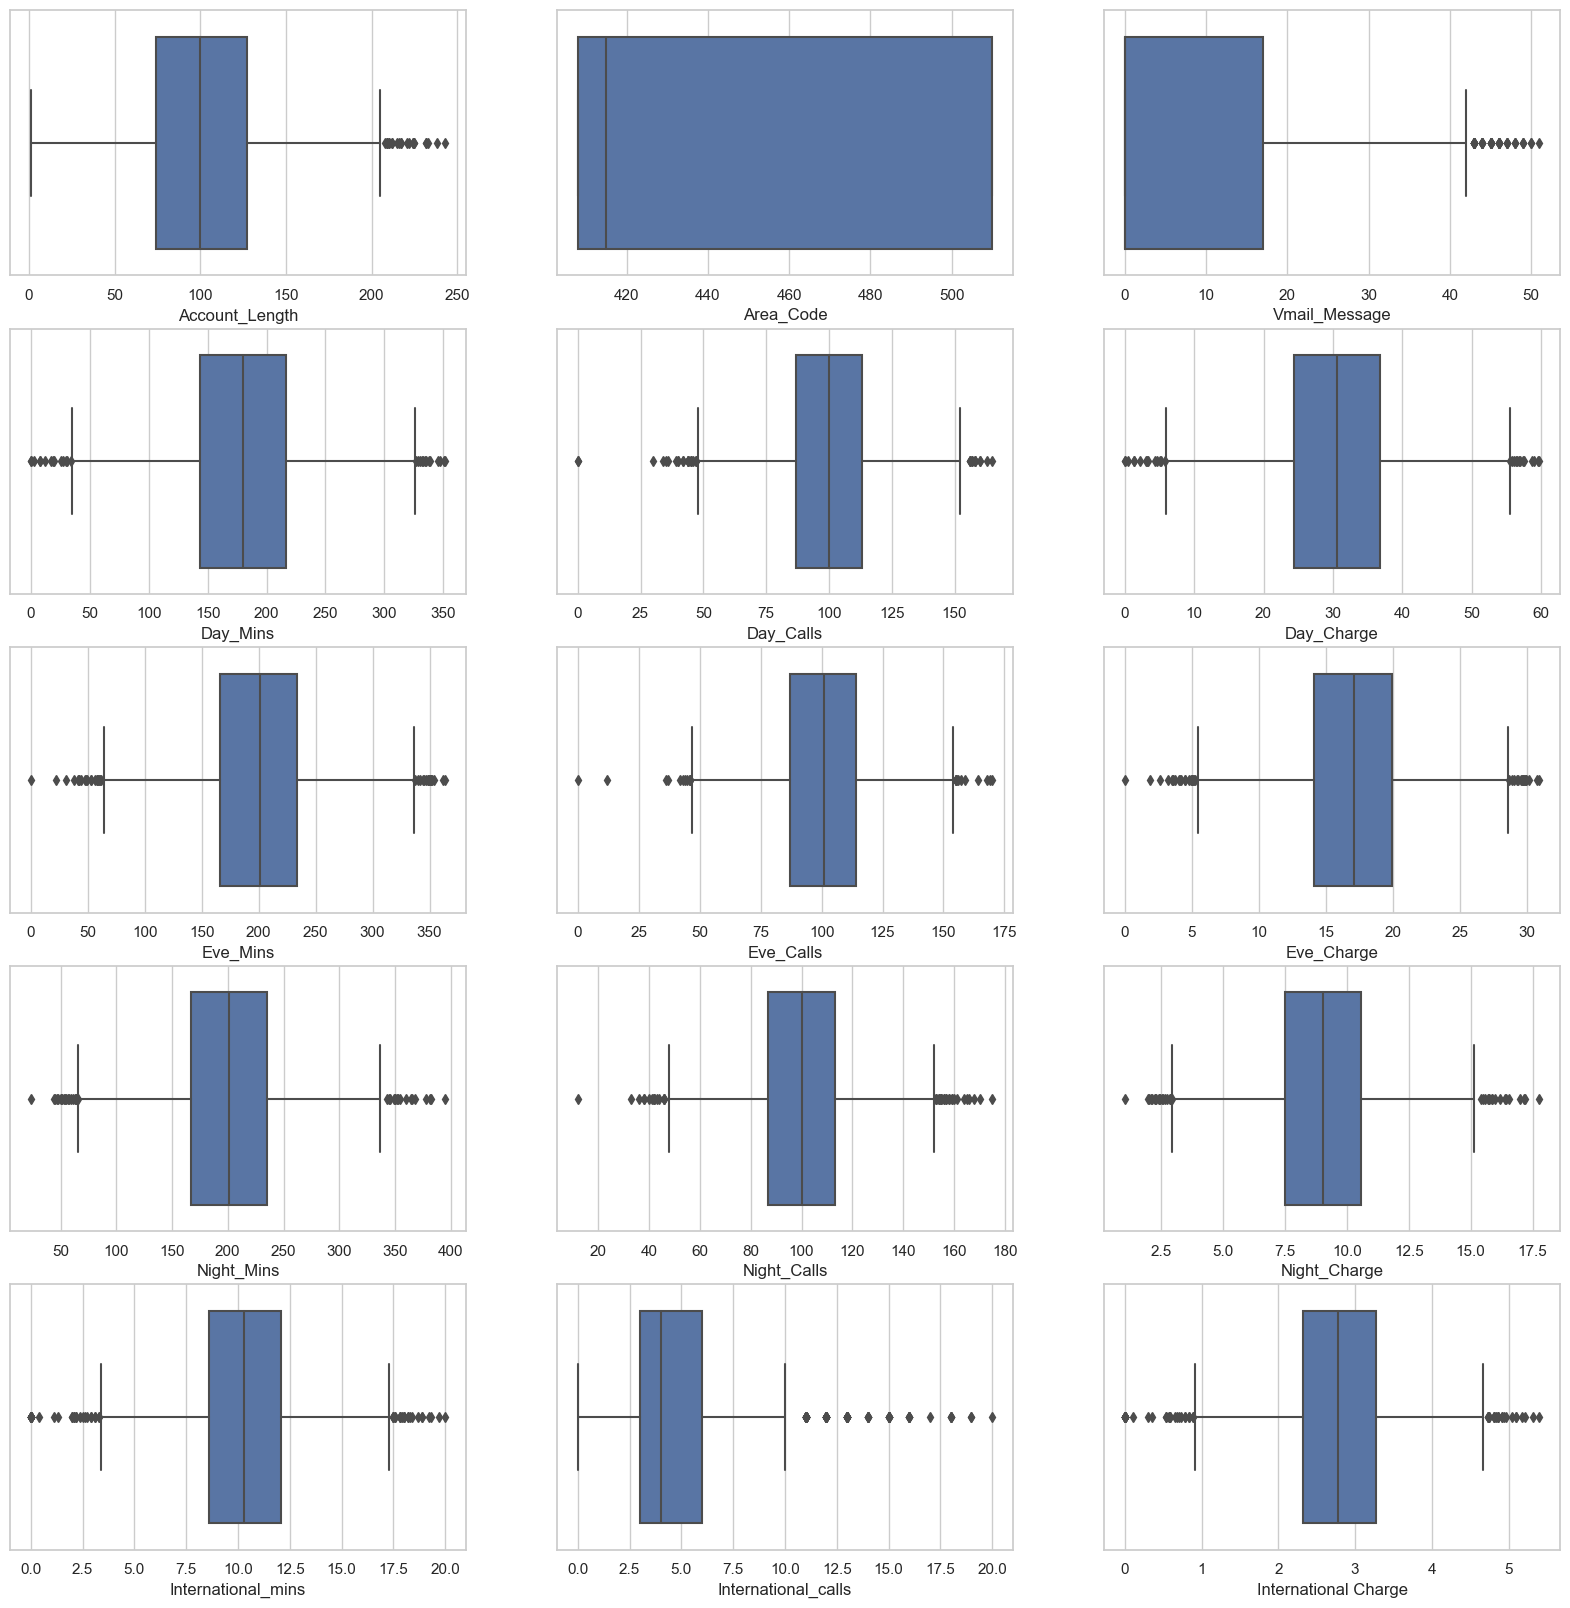

In [ ]:
plt.figure(figsize=(20,20))
plot_num=1
for i in data.select_dtypes(include=['float64','int64']):
    if plot_num<=15:
        plt.subplot(5,3,plot_num)
        sns.boxplot(x=data[i])
    plot_num+=1

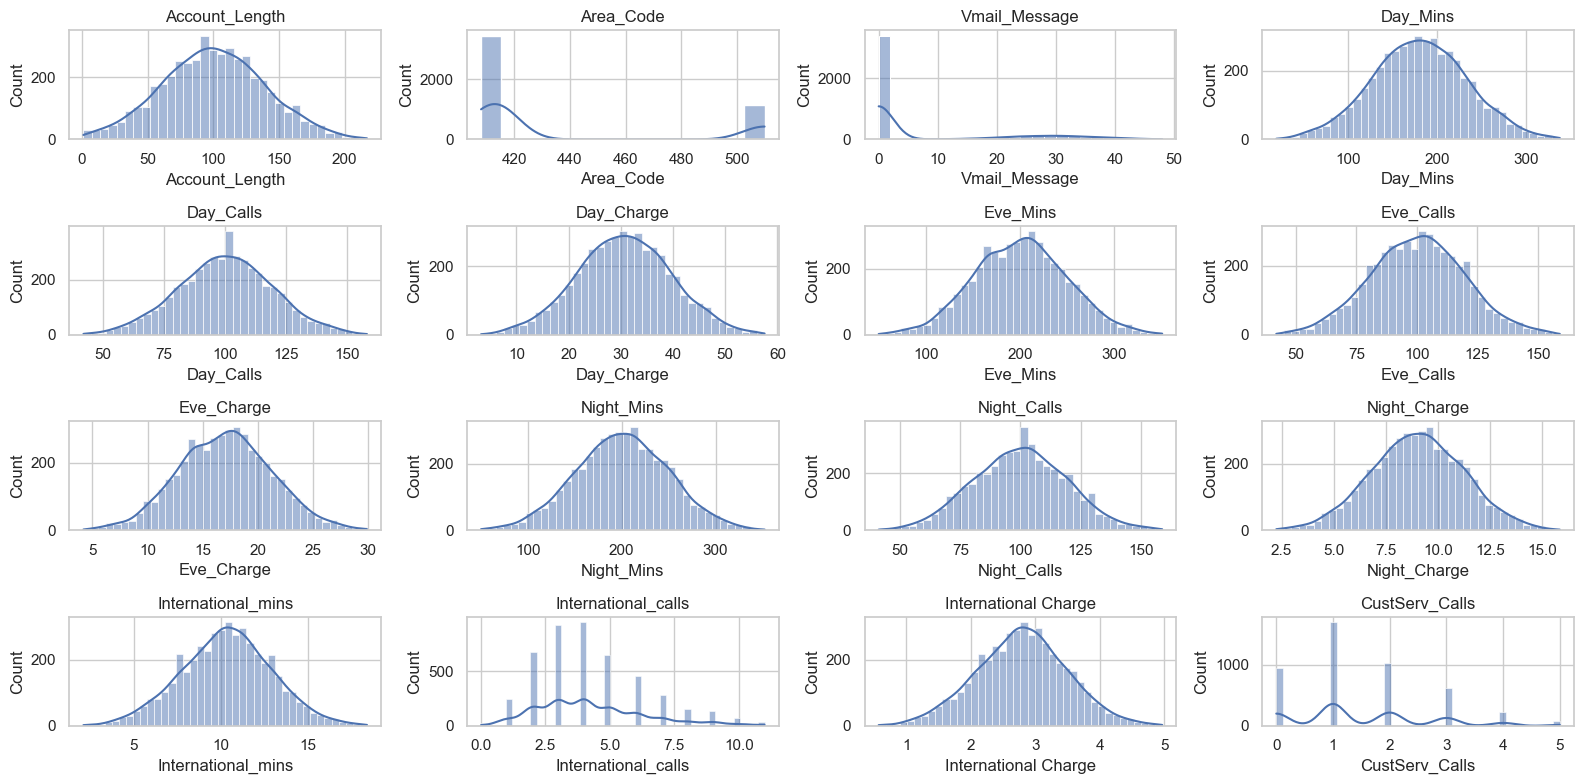

In [ ]:
from scipy.stats import zscore, shapiro
# Columns to process
columns_to_process = data.select_dtypes(include=['float64','int64']).columns
# Function to handle outliers in a column using Z-score
def handle_outliers_zscore(column):
    z_scores = np.abs(zscore(data[column]))
    threshold = 3  # You can adjust this threshold based on your requirements

    # Identify outliers
    outliers = z_scores > threshold

    # Check normality using Shapiro-Wilk test
    _, p_value = shapiro(data[column])

    if p_value < 0.05:
        # If not normally distributed, replace outliers with median
        data.loc[outliers, column] = data[column].median()
    else:
        # If normally distributed, replace outliers with mean
        data.loc[outliers, column] = data[column].mean()

# Iterate through columns and handle outliers
for column in columns_to_process:
    handle_outliers_zscore(column)

# Visualize the distribution after handling outliers
plt.figure(figsize=(16, 8))
for i, column in enumerate(columns_to_process, start=1):
    plt.subplot(4, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

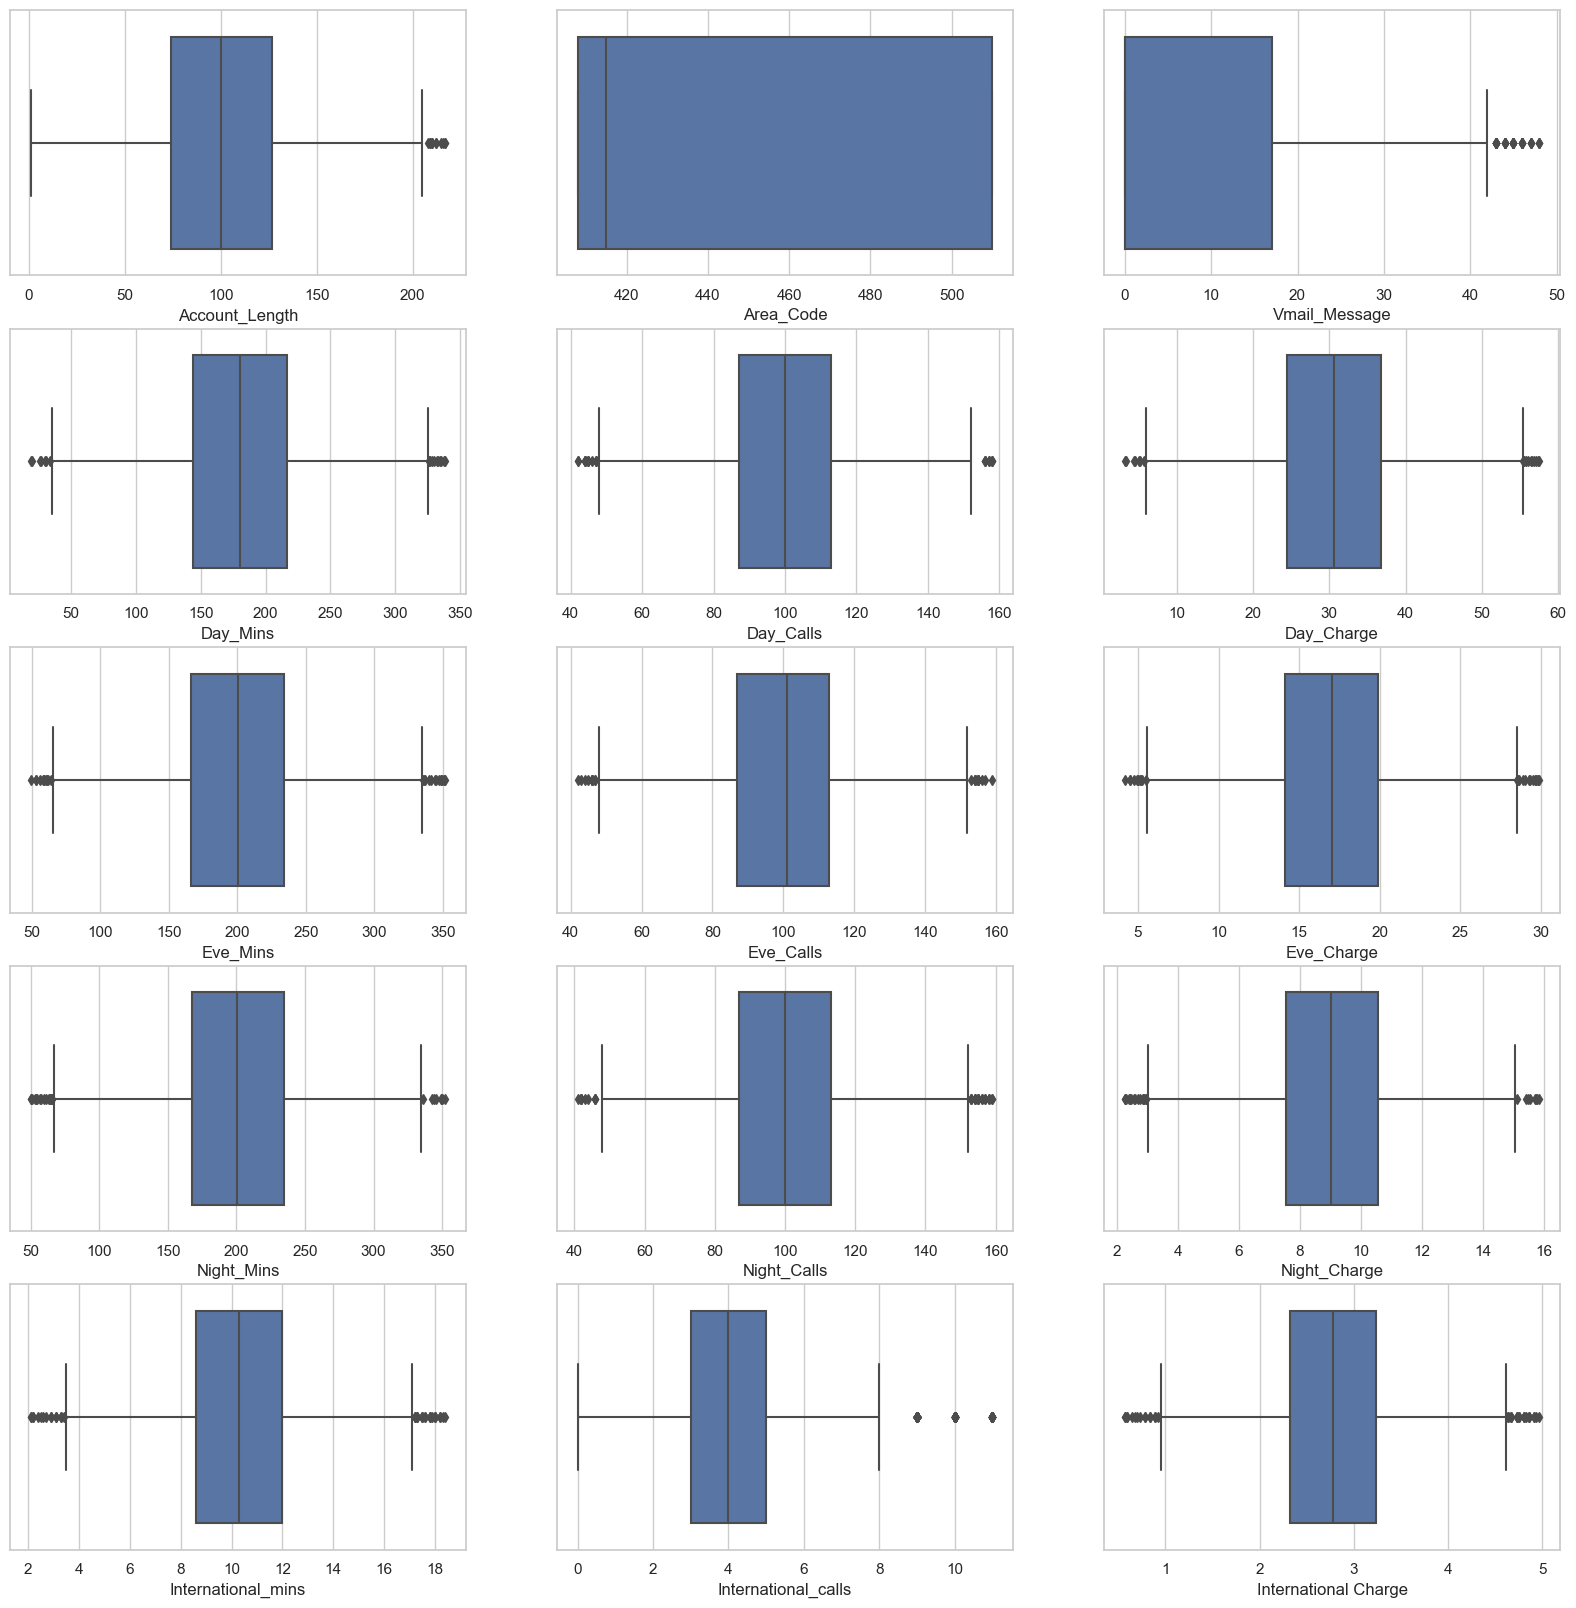

In [ ]:
plt.figure(figsize=(20,20))
plot_num=1
for i in data.select_dtypes(include=['float64','int64']):
    if plot_num<=15:
        plt.subplot(5,3,plot_num)
        sns.boxplot(x=data[i])
    plot_num+=1

## Convert Categorical columns to numerical Columns

In [ ]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_data=data.select_dtypes(include=['object'])
categorical_columns

Index(['State', 'Phone', 'International_plan', 'VMail_Plan', 'Churn'], dtype='object')

In [ ]:
data['International_plan']=categorical_data['International_plan'].str.strip()

In [ ]:
data['International_plan']=data['International_plan'].map({'yes':1,'no':0})

In [ ]:
data['VMail_Plan']=categorical_data['VMail_Plan'].str.strip()

In [ ]:
data['VMail_Plan']


0       yes
1       yes
2        no
3        no
4        no
       ... 
4612    yes
4613    yes
4614    yes
4615    yes
4616     no
Name: VMail_Plan, Length: 4617, dtype: object

In [ ]:
data['VMail_Plan']=data['VMail_Plan'].map({'yes':0,'no':1})

In [ ]:
data['Churn']=categorical_data['Churn'].str.strip()

In [ ]:
data['Churn']=data['Churn'].map({'False.':1,'True.':0})

## Drop Unwanted Columns

In [ ]:
data.drop(['Phone','State','Account_Length','Area_Code'],axis=1,inplace=True)

In [ ]:
# Drop highly correlated features
data.drop(columns=features_to_remove,axis=1,inplace=True)

In [ ]:
data.head()

,International_plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_mins,International_calls,CustServ_Calls,Churn
0,0,0,25,265.1,110,197.4,99,244.7,91.0,10.0,3,1,1
1,0,0,26,161.6,123,195.5,103,254.4,103.0,13.7,3,1,1
2,0,1,0,243.4,114,121.2,110,162.6,104.0,12.2,5,0,1
3,1,1,0,299.4,71,61.9,88,196.9,89.0,6.6,7,2,1
4,1,1,0,166.7,113,148.3,122,186.9,121.0,10.1,3,3,1


In [ ]:
data.shape

(4617, 13)

# Check Data Balancing

In [ ]:
data['Churn'].value_counts()

1    3961
0     656
Name: Churn, dtype: int64

the dataset is imbalanced, as there are significantly more instances of one class ('Churn' value of 1) compared to the other class ('Churn' value of 0).

In [ ]:
# Identify features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now X_train_resampled and y_train_resampled are the balanced datasets

# Check the class distribution after applying SMOTE
print("Class distribution after applying SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after applying SMOTE:
0    3162
1    3162
Name: Churn, dtype: int64


# SCALING OF DATA

In [ ]:
from sklearn.preprocessing  import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train_resampled[['Vmail_Message','Day_Mins','Day_Calls','Eve_Mins','Eve_Calls','Night_Mins','Night_Calls','International_mins']]= scaler.fit_transform(X_train_resampled[['Vmail_Message','Day_Mins','Day_Calls','Eve_Mins','Eve_Calls','Night_Mins','Night_Calls','International_mins']])



In [ ]:
X_train_resampled

,International_plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_mins,International_calls,CustServ_Calls
0,1,1,0.000000,0.713302,0.586207,0.520716,0.179487,0.523999,0.694915,0.680982,5,0
1,0,1,0.000000,0.669171,0.620690,0.454756,0.692308,0.341609,0.686441,0.576687,6,5
2,0,0,0.645833,0.388732,0.396552,0.621147,0.196581,0.588216,0.669492,0.570552,5,2
3,0,1,0.000000,0.620344,0.293103,0.517070,0.495726,0.448858,0.423729,0.447853,3,2
4,0,0,0.666667,0.542723,0.344828,0.384819,0.786325,0.512744,0.279661,0.423313,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6319,0,1,0.000000,0.887046,0.318966,0.410822,0.547009,0.424676,0.536048,0.301784,6,2
6320,0,1,0.000000,0.262812,0.534483,0.411644,0.504274,0.662801,0.449280,0.587535,2,5
6321,0,1,0.000000,0.729798,0.612069,0.556733,0.666667,0.683064,0.293337,0.604126,2,1
6322,0,0,0.187500,0.355568,0.344828,0.331848,0.529915,0.686000,0.475094,0.629398,3,3


In [ ]:
data=X_train_resampled


In [ ]:
data['Churn']=y_train_resampled

In [ ]:
data.to_csv('new_dataset_v1.csv')

In [ ]:
data=pd.read_csv('new_dataset_v1.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)

pd.set_option('display.max.columns',None)
data.head()

,International_plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_mins,International_calls,CustServ_Calls,Churn
0,1,1,0.000000,0.713302,0.586207,0.520716,0.179487,0.523999,0.694915,0.680982,5,0,0
1,0,1,0.000000,0.669171,0.620690,0.454756,0.692308,0.341609,0.686441,0.576687,6,5,1
2,0,0,0.645833,0.388732,0.396552,0.621147,0.196581,0.588216,0.669492,0.570552,5,2,1
3,0,1,0.000000,0.620344,0.293103,0.517070,0.495726,0.448858,0.423729,0.447853,3,2,1
4,0,0,0.666667,0.542723,0.344828,0.384819,0.786325,0.512744,0.279661,0.423313,1,2,1


In [ ]:
# Identify features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize models
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
lr_classifier = LogisticRegression(random_state=42)
knn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier(random_state=42)
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train and evaluate each model
models = [rf_classifier, svm_classifier, lr_classifier, knn_classifier,dt_classifier,xgb_classifier]

for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Display results
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    print("\n" + "="*50 + "\n")

Model: RandomForestClassifier
Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       628
           1       0.90      0.92      0.91       637

    accuracy                           0.91      1265
   macro avg       0.91      0.91      0.91      1265
weighted avg       0.91      0.91      0.91      1265



Model: SVC
Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70       628
           1       0.71      0.69      0.70       637

    accuracy                           0.70      1265
   macro avg       0.70      0.70      0.70      1265
weighted avg       0.70      0.70      0.70      1265



Model: LogisticRegression
Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       628
           1       0.68      0.65      0.67      

## Overfitting

In [ ]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize models
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
lr_classifier = LogisticRegression(random_state=42)
knn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier(random_state=42)
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train and evaluate each model
models = [rf_classifier, svm_classifier, lr_classifier, knn_classifier,dt_classifier,xgb_classifier]


# Train and evaluate each model on the training and validation sets
for model in models:
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = model.predict(X_train)

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Evaluate the model on the training set
    accuracy_train = accuracy_score(y_train, y_train_pred)
    report_train = classification_report(y_train, y_train_pred)

    # Evaluate the model on the validation set
    accuracy_valid = accuracy_score(y_valid, y_valid_pred)
    report_valid = classification_report(y_valid, y_valid_pred)

    # Display results
    print(f"Model: {model.__class__.__name__}")
    print(f"Training Accuracy: {accuracy_train:.2f}")
    print("Training Classification Report:\n", report_train)
    print(f"Validation Accuracy: {accuracy_valid:.2f}")
    print("Validation Classification Report:\n", report_valid)
    # Check for overfitting
    if accuracy_train > accuracy_valid + 0.02:  # Adjust the threshold as needed
        print("Potential Overfitting: Training Accuracy > Validation Accuracy")
    else:
        print("No Overfitting Detected")
    print("\n" + "="*50 + "\n")





Model: RandomForestClassifier
Training Accuracy: 1.00
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       1.00      1.00      1.00      2191

    accuracy                           1.00      4426
   macro avg       1.00      1.00      1.00      4426
weighted avg       1.00      1.00      1.00      4426

Validation Accuracy: 0.91
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       460
           1       0.90      0.93      0.91       489

    accuracy                           0.91       949
   macro avg       0.91      0.91      0.91       949
weighted avg       0.91      0.91      0.91       949

Potential Overfitting: Training Accuracy > Validation Accuracy


Model: SVC
Training Accuracy: 0.74
Training Classification Report:
               precision    recall  f1-score   support

          

## Hyper Parameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
error_rate

[0.22608695652173913,
 0.28221343873517785,
 0.24743083003952568,
 0.2893280632411067,
 0.258498023715415,
 0.2845849802371542,
 0.26798418972332017,
 0.291699604743083,
 0.2648221343873518,
 0.28063241106719367]

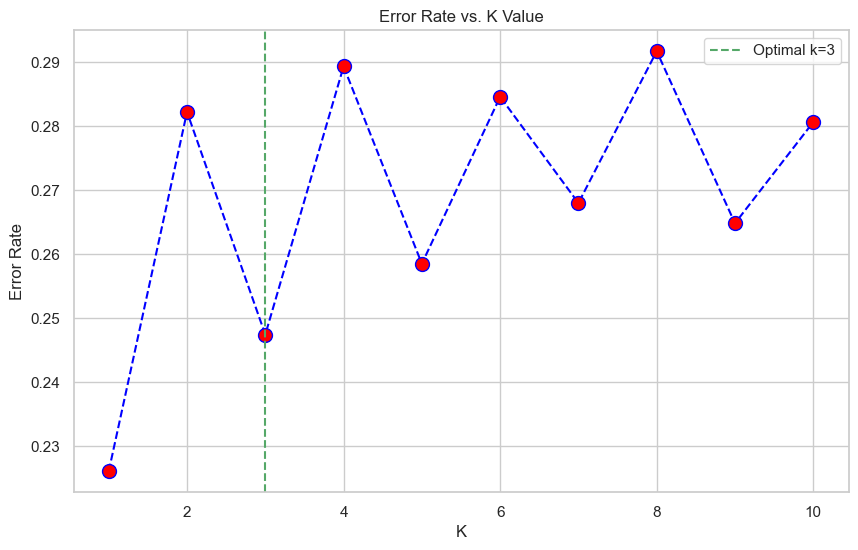

In [ ]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Highlighting the optimal k value
optimal_k = 3
plt.axvline(x=optimal_k, color='g', linestyle='--', label=f'Optimal k={optimal_k}')
plt.legend()

plt.show()

In [ ]:
# For Optimal value k=3 predict the value using KNN
# Create and train a k-NN classifier (e.g., with k=9)
k = 3  # You can adjust the value of k as needed
knn_classifier_optimal = KNeighborsClassifier(n_neighbors=k)
knn_classifier_optimal.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predict_knn_optimal=knn_classifier_optimal.predict(X_test)
# Calculate accuracy and generate a classification report
accuracy_knn_optimal = accuracy_score(y_test, y_predict_knn_optimal)
classification_report_knn_optimal = classification_report(y_test, y_predict_knn_optimal)

print("K-Nearest Neighbors Classifier:")
print(f"Accuracy on Test Data: {accuracy_knn_optimal:.2f}")
print("Classification Report on Test Data:\n", classification_report_knn_optimal)

K-Nearest Neighbors Classifier:
Accuracy on Test Data: 0.75
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76       628
           1       0.78      0.70      0.74       637

    accuracy                           0.75      1265
   macro avg       0.76      0.75      0.75      1265
weighted avg       0.76      0.75      0.75      1265



## Random Forest Classifier

In [ ]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Display the best cross-validated accuracy
print("Best Cross-validated Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validated Accuracy: 0.9124302631527506


In [ ]:
# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Make predictions using the best Random Forest classifier
y_pred_tuned_rf = best_rf_classifier.predict(X_test)

# Evaluate the tuned model's performance
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
classification_report_rf_tuned = classification_report(y_test, y_pred_tuned_rf)

print("Random Forest Classifier with Hyperparameters (Tuned):")

print(f"Accuracy: {accuracy_tuned_rf:.2f}")
print("Classification Report:\n", classification_report_rf_tuned)

Random Forest Classifier with Hyperparameters (Tuned):
Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       628
           1       0.90      0.92      0.91       637

    accuracy                           0.91      1265
   macro avg       0.91      0.91      0.91      1265
weighted avg       0.91      0.91      0.91      1265



In [ ]:
#Random Forest Classifier with Hyperparameters (Tuned)
# Define the hyperparameters and their possible values for tuning
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features= ['sqrt'] #done by me due to warning
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling

#dictionary for hyperparameters
param_grid_rf = {'n_estimators': n_estimators,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

# Create a Random Forest classifier
rf_classifier_tuned = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_classifier_tuned, scoring='accuracy',param_distributions=param_grid_rf, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)



rf_cv.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = rf_cv.best_params_

# Get the best model
best_rf_classifier = rf_cv.best_estimator_

# Make predictions using the best Random Forest classifier
y_pred_tuned_rf = best_rf_classifier.predict(X_test)

# Evaluate the tuned model's performance
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
classification_report_rf_tuned = classification_report(y_test, y_pred_tuned_rf)

print("Random Forest Classifier with Hyperparameters (Tuned):")
print(f"Best Hyperparameters: {best_params_rf}")
print(f"Accuracy: {accuracy_tuned_rf:.2f}")
print("Classification Report:\n", classification_report_rf_tuned)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Random Forest Classifier with Hyperparameters (Tuned):
Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': False}
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       628
           1       0.92      0.94      0.93       637

    accuracy                           0.93      1265
   macro avg       0.93      0.93      0.93      1265
weighted avg       0.93      0.93      0.93      1265



## Logistic Classification

In [ ]:
##Logistic Regression using Hyper parameter tunning GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters and their possible values for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],  # Solver for optimization
    'penalty': ['l2']  # Regularization type
}
# Create a Logistic Regression model
logistic_regression_gridcv = LogisticRegression(max_iter=1500)

# Create a GridSearchCV object
grid_search_logistic = GridSearchCV(estimator=logistic_regression_gridcv, param_grid=param_grid, cv=5, scoring='accuracy')
# Fit the grid search to your training data
grid_search_logistic.fit(X_train, y_train)

# Get the best hyperparameters
best_params_logistic_cv = grid_search_logistic.best_params_

# Get the best model
best_logistic_regression = grid_search_logistic.best_estimator_

# Make predictions using the best Logistic Regression model
y_pred_logistic_gridcv = best_logistic_regression.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy_logitic_cv = accuracy_score(y_test, y_pred_logistic_gridcv)
classification_report_logistic_cv = classification_report(y_test, y_pred_logistic_gridcv)

print("Best Logistic Regression Model:")
print(f"Best Hyperparameters: {best_params_logistic_cv}")
print(f"Accuracy: {accuracy_logitic_cv:.2f}")
print("Classification Report:\n", classification_report_logistic_cv)



Best Logistic Regression Model:
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       628
           1       0.68      0.65      0.67       637

    accuracy                           0.67      1265
   macro avg       0.67      0.67      0.67      1265
weighted avg       0.67      0.67      0.67      1265



In [ ]:
# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Define the hyperparameter distribution to sample from
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(logreg_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Perform Randomized Search
random_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Display the best cross-validated accuracy
print("Best Cross-validated Accuracy:", random_search.best_score_)

# Evaluate the model on the test set
y_pred = random_search.predict(X_test)

# Display test set results
print("\nTest Set Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'solver': 'saga', 'penalty': 'none', 'max_iter': 100, 'C': 10}
Best Cross-validated Accuracy: 0.6944065868333704

Test Set Results:
Accuracy: 0.6719367588932806
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       628
           1       0.68      0.65      0.67       637

    accuracy                           0.67      1265
   macro avg       0.67      0.67      0.67      1265
weighted avg       0.67      0.67      0.67      1265



## Decision Tree Algorithm

In [ ]:
## Decision Tree with Hyperparameter Tunning
# Define the hyperparameters and their possible values for tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    "splitter":("best", "random"), # searches the features for a split
    'max_depth': (list(range(1, 20))),  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': list(range(1, 20))  # Minimum samples required to be a leaf node
}

# Create a Decision Tree classifier
dt_classifier_tuned = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt_classifier_tuned, param_grid=param_grid_dt,n_jobs=-1, verbose=1, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Get the best model
best_dt_classifier = grid_search_dt.best_estimator_

# Make predictions using the best Decision Tree classifier
y_pred_tuned_dt = best_dt_classifier.predict(X_test)

# Evaluate the tuned model's performance
accuracy_tuned_dt = accuracy_score(y_test, y_pred_tuned_dt)
classification_report_dt_tuned = classification_report(y_test, y_pred_tuned_dt)

print("Decision Tree Classifier with Hyperparameters (Tuned):")
print(f"Best Hyperparameters: {best_params_dt}")
print(f"Accuracy: {accuracy_tuned_dt:.2f}")
print("Classification Report:\n", classification_report_dt_tuned)


Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Decision Tree Classifier with Hyperparameters (Tuned):
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       628
           1       0.83      0.84      0.83       637

    accuracy                           0.83      1265
   macro avg       0.83      0.83      0.83      1265
weighted avg       0.83      0.83      0.83      1265



## XGBoost Classifier

In [ ]:
# Create an XGBoost classifier for multi-class classification
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define a parameter grid to search over
param_grid_xgb = {
   'n_estimators': [10, 100,110],  # Number of boosting rounds
    'max_depth': [1, 3, 4],  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for training each tree
}

# Create a GridSearchCV object with cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Get the best model
best_xgb_classifier = grid_search_xgb.best_estimator_

# Make predictions using the best XGBoost classifier
y_pred_best_xgb = best_xgb_classifier.predict(X_test)

# Evaluate the tuned model's performance
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
classification_report_best_xgb = classification_report(y_test, y_pred_best_xgb)

print("XGBoost Classifier with Hyperparameter Tuning (Grid Search):")
print(f"Best Hyperparameters: {best_params_xgb}")
print(f"Accuracy: {accuracy_best_xgb:.2f}")
print("Classification Report:\n", classification_report_best_xgb)



XGBoost Classifier with Hyperparameter Tuning (Grid Search):
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 110, 'subsample': 0.9}
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.87       628
           1       0.85      0.91      0.88       637

    accuracy                           0.87      1265
   macro avg       0.88      0.87      0.87      1265
weighted avg       0.88      0.87      0.87      1265



In [ ]:
# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the hyperparameter distribution to sample from
param_dist = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [50, 100, 200, 300, 400],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Perform Randomized Search
random_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Display the best cross-validated accuracy
print("Best Cross-validated Accuracy:", random_search.best_score_)

# Evaluate the model on the test set
y_pred = random_search.predict(X_test)

# Display test set results
print("\nTest Set Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.3, 'colsample_bytree': 0.9}
Best Cross-validated Accuracy: 0.921126110804862

Test Set Results:
Accuracy: 0.9280632411067193
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       628
           1       0.93      0.93      0.93       637

    accuracy                           0.93      1265
   macro avg       0.93      0.93      0.93      1265
weighted avg       0.93      0.93      0.93      1265



## SVC

In [ ]:
# Initialize Support Vector Classifier
svc_model = SVC(random_state=42)

# Define the hyperparameter distribution to sample from
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(svc_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Perform Randomized Search
random_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Display the best cross-validated accuracy
print("Best Cross-validated Accuracy:", random_search.best_score_)

# Evaluate the model on the test set
y_pred = random_search.predict(X_test)

# Display test set results
print("\nTest Set Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


## Model Comparison Report

In [ ]:
model_results = pd.DataFrame(columns=['Model', 'Accuracy'])
models = ['Logistic Regression', 'K-Nearest Neighbors (KNN)', 'Decision Tree','Random Forest','Support Vector Machine','XGBoost']
accuracy = [0.67, 0.75, 0.83,0.93,0.70,0.92]

# Populate the DataFrame
model_results['Model'] = models
model_results['Accuracy'] = accuracy

# Display the results
model_results

,Model,Accuracy
0,Logistic Regression,0.67
1,K-Nearest Neighbors (KNN),0.75
2,Decision Tree,0.83
3,Random Forest,0.93
4,Support Vector Machine,0.70
5,XGBoost,0.92


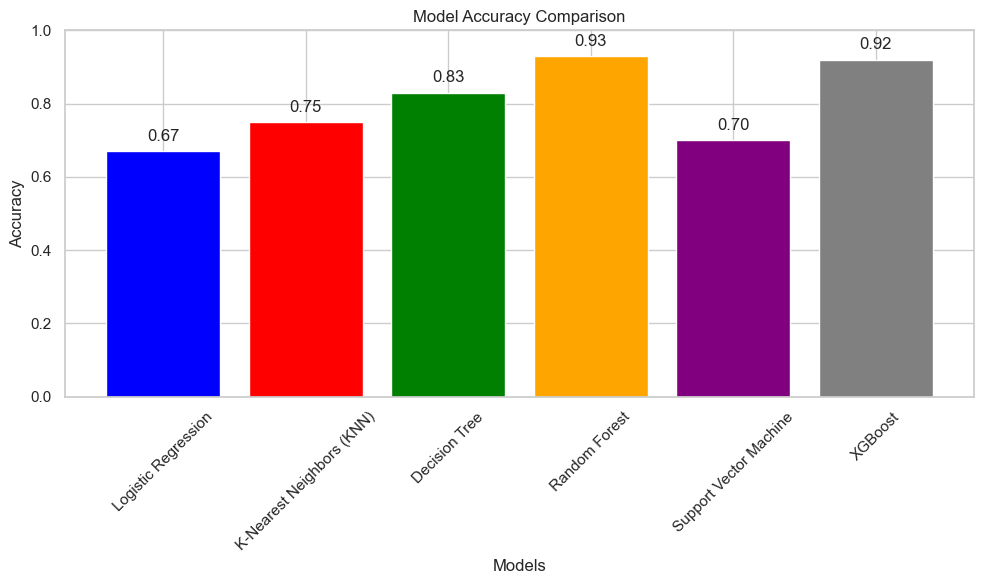

In [ ]:
# Create a bar chart to visualize model accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'red', 'green', 'orange', 'purple', 'gray'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limit to the range [0, 1]
plt.xticks(rotation=45)  # Rotate model names for better visibility

# Display accuracy values on top of the bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the bar chart
plt.tight_layout()
plt.show()

<h2>Logistic Regression (Accuracy: 0.67)</h2>
<p><strong>Insights:</strong> The model seems to have a lower accuracy compared to other models. It's possible that the data might not be linearly separable, which is an assumption of logistic regression.</p>

<h2>K-Nearest Neighbors (KNN) (Accuracy: 0.75)</h2>
<p><strong>Insights:</strong> The accuracy is moderate. KNN's performance can be sensitive to the choice of the number of neighbors (k) and the distance metric used.</p>

<h2>Decision Tree (Accuracy: 0.83)</h2>
<p><strong>Insights:</strong> Decision trees are interpretable and can capture nonlinear relationships well. The accuracy is decent.</p>

<h2>Random Forest (Accuracy: 0.93)</h2>
<p><strong>Insights:</strong> Random Forests are an ensemble of decision trees, and they are performing very well with high accuracy.</p>

<h2>Support Vector Machine (Accuracy: 0.70)</h2>
<p><strong>Insights:</strong> The accuracy is moderate. SVM's performance can be affected by the choice of the kernel and hyperparameter settings.</p>

<h2>XGBoost (Accuracy: 0.92)</h2>
<p><strong>Insights:</strong> XGBoost is a powerful ensemble method, and it's performing exceptionally well with high accuracy.</p>


<h1>Data Challenges and Hyperparameter Tuning Report</h1>


<h1>Executive Summary</h1>

<p>This report provides insights into the challenges encountered during the analysis of the dataset and the strategies employed for hyperparameter tuning to optimize model performance. The analysis covers machine learning models, including Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Support Vector Machine (SVM), and XGBoost.</p>

<h2>Data Challenges</h2>

<ol>
<li>
    <h3>Imbalanced Classes</h3>
    <p><strong>Observation:</strong> The dataset exhibits class imbalance.</p>
    <p><strong>Impact:</strong> Imbalanced classes can lead to biased model training and suboptimal performance.</p>
    <p><strong>Strategy:</strong> Techniques such as oversampling the minority class (e.g., using SMOTE) or adjusting class weights during training were explored to address this challenge.</p>
</li>

<li>
    <h3>Outliers</h3>
    <p><strong>Observation:</strong> Outliers were identified in certain features.</p>
    <p><strong>Impact:</strong> Outliers can influence model training, especially for algorithms sensitive to extreme values.</p>
    <p><strong>Strategy:</strong> Outliers were addressed using statistical methods such as Z-score analysis, and decisions were made to either adjust, transform, or remove outliers based on their impact.</p>
</li>
</ol>

<h2>Hyperparameter Tuning Strategies</h2>

<ol>
<li>
    <h3>Logistic Regression</h3>
    <p><strong>Hyperparameter Tuning:</strong> Regularization strength (C), penalty (L1, L2), solver, and maximum number of iterations were tuned.</p>
    <p><strong>Results:</strong> Despite efforts, logistic regression achieved a modest accuracy of 0.67.</p>
</li>

<li>
    <h3>K-Nearest Neighbors (KNN)</h3>
    <p><strong>Hyperparameter Tuning:</strong> The number of neighbors (k) and distance metric were tuned.</p>
    <p><strong>Results:</strong> KNN demonstrated moderate performance with an accuracy of 0.75.</p>
</li>

<li>
    <h3>Decision Tree</h3>
    <p><strong>Hyperparameter Tuning:</strong> Maximum depth and minimum samples split were tuned.</p>
    <p><strong>Results:</strong> Decision Tree showed good performance with an accuracy of 0.83.</p>
</li>

<li>
    <h3>Random Forest</h3>
    <p><strong>Hyperparameter Tuning:</strong> Number of trees, maximum depth, minimum samples split, and subsampling ratio were tuned.</p>
    <p><strong>Results:</strong> Random Forest outperformed other models with a high accuracy of 0.93.</p>
</li>

<li>
    <h3>Support Vector Machine (SVM)</h3>
    <p><strong>Hyperparameter Tuning:</strong> Regularization parameter (C), kernel, and gamma were tuned.</p>
    <p><strong>Results:</strong> SVM achieved a moderate accuracy of 0.70.</p>
</li>

<li>
    <h3>XGBoost</h3>
    <p><strong>Hyperparameter Tuning:</strong> Learning rate, maximum depth, number of estimators, subsampling, and column subsampling were tuned.</p>
    <p><strong>Results:</strong> XGBoost demonstrated exceptional performance with an accuracy of 0.92.</p>
</li>
</ol>

<h2>Conclusion</h2>

<p>The analysis revealed several data challenges, including imbalanced classes and outliers. Hyperparameter tuning strategies were employed to optimize model performance, with Random Forest and XGBoost emerging as top performers.
</p>


## Feature Importance

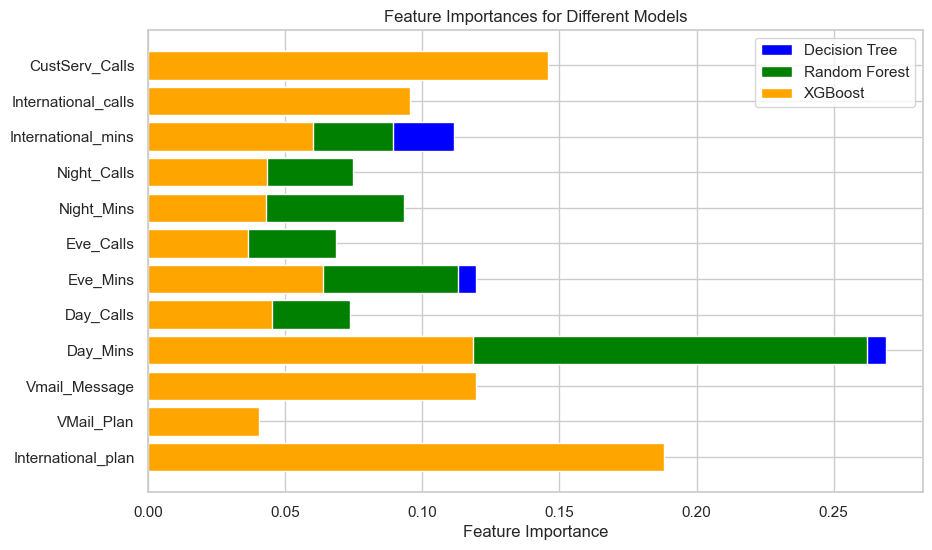

[CV] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   9.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   4.6s
[CV] END bootstrap=False, max_depth=80, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, max_depth=80, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  12.1s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   5.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   5.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   6.1s
[CV] END bootstrap=False, max_depth=70, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.0s
[CV] END bootstrap=False, max_depth=90, min_samples_

In [ ]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
dt_feature_importances = dt_model.feature_importances_
rf_feature_importances = rf_model.feature_importances_
xgb_feature_importances = xgb_model.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'DecisionTree': dt_feature_importances,
    'RandomForest': rf_feature_importances,
    'XGBoost': xgb_feature_importances
})

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['DecisionTree'], color='blue', label='Decision Tree')
plt.barh(feature_importances_df['Feature'], feature_importances_df['RandomForest'], color='green', label='Random Forest')
plt.barh(feature_importances_df['Feature'], feature_importances_df['XGBoost'], color='orange', label='XGBoost')
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Different Models')
plt.legend()
plt.show()


## Creating Churn risk scores that can be indicative to drive retention campaigns.

In [ ]:
x=data.drop('Churn',axis=1)
y=data['Churn']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

#Make predictions on the test set
y_pred = model.predict(x_test)

#Assign churn risk scores
churn_probabilities = model.predict_proba(x_test)[:,1]  # Probability of churn
data_probabilities = pd.concat([x_test.reset_index(drop=False), pd.Series(y_pred, name='Predicted Churn'), pd.Series(churn_probabilities, name='Churn Probability')], axis=1)

# Display the test set with churn risk scores
data_probabilities

,index,International_plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_mins,International_calls,CustServ_Calls,Predicted Churn,Churn Probability
0,6066,0,1,0.000000,0.806166,0.456897,0.662499,0.435897,0.403162,0.643439,0.401880,8,1,0,0.000693
1,6264,0,1,0.000000,0.786780,0.577586,0.722814,0.598291,0.534629,0.581717,0.339742,7,1,0,0.001230
2,957,1,1,0.000000,0.492019,0.396552,0.647332,0.358974,0.462761,0.491525,0.558282,1,2,0,0.010229
3,1438,0,0,0.458333,0.642254,0.732759,0.628439,0.367521,0.410791,0.381356,0.576687,7,2,1,0.967663
4,1779,0,1,0.000000,0.595305,0.534483,0.464700,0.461538,0.543860,0.355932,0.779141,4,3,1,0.960824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,4763,0,1,0.000000,0.748361,0.362069,0.624409,0.555556,0.315875,0.644638,0.672293,5,1,0,0.331212
1261,670,0,1,0.000000,0.379343,0.775862,0.531654,0.717949,0.708375,0.305085,0.361963,2,1,1,0.896325
1262,2640,0,1,0.000000,0.543662,0.568966,0.577063,0.547009,0.453161,0.364407,0.128834,2,1,1,0.990356
1263,5838,0,0,0.458333,0.463412,0.370690,0.574479,0.393162,0.484475,0.501278,0.610118,4,1,0,0.255630


In [ ]:
risk_score=len(data_probabilities.loc[data_probabilities['Predicted Churn']==1])/len(x_test)*100
print("Risk Score is",round(risk_score),"%")

Risk Score is 52 %


## Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers.

In [ ]:
data_probabilities.rename(columns={'Predicted Churn': 'CHURN-FLAG'}, inplace=True)

In [ ]:

target_cust=data_probabilities.loc[data_probabilities['CHURN-FLAG']==1]
target_cust

,index,International_plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_mins,International_calls,CustServ_Calls,CHURN-FLAG,Churn Probability
3,1438,0,0,0.458333,0.642254,0.732759,0.628439,0.367521,0.410791,0.381356,0.576687,7,2,1,0.967663
4,1779,0,1,0.000000,0.595305,0.534483,0.464700,0.461538,0.543860,0.355932,0.779141,4,3,1,0.960824
7,2277,0,1,0.000000,0.538341,0.172414,0.588001,0.094017,0.595829,0.466102,0.349693,3,2,1,0.999268
8,1387,0,1,0.000000,0.502660,0.681034,0.472986,0.760684,0.381993,0.711864,0.607362,4,0,1,0.941253
9,5571,0,1,0.000000,0.623707,0.732759,0.210394,0.393162,0.312844,0.746654,0.854647,7,1,1,0.797532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2310,1,1,0.000000,0.768075,0.422414,0.370235,0.623932,0.491559,0.271186,0.441718,5,0,1,0.995591
1258,2643,0,1,0.000000,0.667293,0.336207,0.535631,0.504274,0.381662,0.389831,0.791411,6,5,1,0.969241
1259,2050,0,1,0.000000,0.682003,0.517241,0.390786,0.384615,0.761668,0.627119,0.466258,3,3,1,0.973585
1261,670,0,1,0.000000,0.379343,0.775862,0.531654,0.717949,0.708375,0.305085,0.361963,2,1,1,0.896325
